## Assignment: predicting house prices

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle that we've ported to a Postgres database. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

To complete this assignment, create a Jupyter notebook containing your solutions to the following tasks:

* Load the dataset from the Thinkful PostgreSQL database. You'll need the following values:

```python
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
```

* Please follow the example above and call `engine.dispose()` when you no longer need to make db queries. You need to be in the habit of responsibly managing database connections, and the database only supports a limited number of connections.
* Investigate the data, and do any necessary data cleaning.
* Explore the data and find some variables that you think would be useful in predicting house prices.
* Build your initial model using these features and estimate the parameters using OLS.


Spend up to 4 hours on this assignment. When you are done and have submitted a link to your notebook below, feel free to take a look at [this example solution](https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/2.solution_simple_linear_regression_models.ipynb).



# 1: Obtaining/Describing the Data

The first step is to bring the data in, it is also useful to import the packages and libraries that will be used for this project.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

##  Variable Descriptions:
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

# 2: Exploratory Data Analysis (EDA)

The goal of any EDA is to come up with features that will be useful for modeling machine learning algorithms. This section will be dedicated to this process.

Every EDA should iterate through three phases:
1. Cleaning Data
2. Exploring Data
3. Feature Engineering

The above dataset contains a plethora of variables, this also means it has great potential for feature engineering. The EDA is a vital part of the data science pipeline. If it is not appropriately conducted, any sort of model will be of no use; in other words, "Garbage in, garbage out."

# 2.1: Data Cleaning

## Categorical vs. Continuous Variables

No reason to keep ID as they are just the index plus 1.

In [3]:
df.drop(columns='id', inplace=True)

In [4]:
cat_list = []
for i, val in enumerate(df.nunique()):
    if val < 30:
        print('{}: {} uniques, values of first 5 uniques are...{}'.format(df.nunique().index[i], val, df[str(df.nunique().index[i])].unique().tolist()[:5]))
        cat_list.append(str(df.nunique().index[i]))

mssubclass: 15 uniques, values of first 5 uniques are...[60, 20, 70, 50, 190]
mszoning: 5 uniques, values of first 5 uniques are...['RL', 'RM', 'C (all)', 'FV', 'RH']
street: 2 uniques, values of first 5 uniques are...['Pave', 'Grvl']
alley: 2 uniques, values of first 5 uniques are...[None, 'Grvl', 'Pave']
lotshape: 4 uniques, values of first 5 uniques are...['Reg', 'IR1', 'IR2', 'IR3']
landcontour: 4 uniques, values of first 5 uniques are...['Lvl', 'Bnk', 'Low', 'HLS']
utilities: 2 uniques, values of first 5 uniques are...['AllPub', 'NoSeWa']
lotconfig: 5 uniques, values of first 5 uniques are...['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
landslope: 3 uniques, values of first 5 uniques are...['Gtl', 'Mod', 'Sev']
neighborhood: 25 uniques, values of first 5 uniques are...['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel']
condition1: 9 uniques, values of first 5 uniques are...['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe']
condition2: 8 uniques, values of first 5 uniques are...['Norm

Many of the above variables should fall under categorical; however, there are some that should retain their numerics - those values will be removed from the `cat_list` variable above.

In [5]:
num_cat_list = []
for i, val in enumerate(df.nunique()):
    if val < 30 and pd.to_numeric(df[str(df.nunique().index[i])], errors='coerce').notnull().all() == True:
        print('{}: {} uniques, values of first 5 uniques are...{}'.format(df.nunique().index[i], val, df[str(df.nunique().index[i])].unique().tolist()[:5]))
        num_cat_list.append(str(df.nunique().index[i]))

mssubclass: 15 uniques, values of first 5 uniques are...[60, 20, 70, 50, 190]
overallqual: 10 uniques, values of first 5 uniques are...[7, 6, 8, 5, 9]
overallcond: 9 uniques, values of first 5 uniques are...[5, 8, 6, 7, 4]
lowqualfinsf: 24 uniques, values of first 5 uniques are...[0, 360, 513, 234, 528]
bsmtfullbath: 4 uniques, values of first 5 uniques are...[1, 0, 2, 3]
bsmthalfbath: 3 uniques, values of first 5 uniques are...[0, 1, 2]
fullbath: 4 uniques, values of first 5 uniques are...[2, 1, 3, 0]
halfbath: 3 uniques, values of first 5 uniques are...[1, 0, 2]
bedroomabvgr: 8 uniques, values of first 5 uniques are...[3, 4, 1, 2, 0]
kitchenabvgr: 4 uniques, values of first 5 uniques are...[1, 2, 3, 0]
totrmsabvgrd: 12 uniques, values of first 5 uniques are...[8, 6, 7, 9, 5]
fireplaces: 4 uniques, values of first 5 uniques are...[0, 1, 2, 3]
garagecars: 5 uniques, values of first 5 uniques are...[2, 3, 1, 0, 4]
threessnporch: 20 uniques, values of first 5 uniques are...[0, 320, 407, 

Of the above, the only one I want to change to categorical is `mssubclass` - I want the rest to retain their continuity (what if a house we predict has more than the maximum value listed for a varaiable above?)

In [6]:
num_cat_list.remove('mssubclass')

In [7]:
for var in num_cat_list:
    cat_list.remove(var)

Change our categorical variables into categorical datatype using `Series.astype('category')`.

In [8]:
for var in cat_list:
    df[var] = df[var].astype('category')

There were a number of None values above that should probably be 'None'. The None doesn't indicate that the information is necessarily unavailable, but rather it doesn't exist given other information about the home.

## Missing Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
mssubclass       1460 non-null category
mszoning         1460 non-null category
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null category
alley            91 non-null category
lotshape         1460 non-null category
landcontour      1460 non-null category
utilities        1460 non-null category
lotconfig        1460 non-null category
landslope        1460 non-null category
neighborhood     1460 non-null category
condition1       1460 non-null category
condition2       1460 non-null category
bldgtype         1460 non-null category
housestyle       1460 non-null category
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null category
roofmatl         1460 non-null category
exterior1st      1460 non-null 

- The majority of the variables do not contain missing values.
- From the prior section, it was discovered that a lot of the nulls are probably None, and should probably be some form of 'None' instead.
- Further inspection of the null values is essential.

In [10]:
nulls_list = []
def get_df_nulls():
    global nulls_list
    nulls_list = []
    for i, val in enumerate(df.isnull().sum()):
        if val > 0:
            print('{} - dtype={}: {} null values - {}% null'.format(df.isnull().sum().index[i], df[str(df.isnull().sum().index[i])].dtype, val, round(val/df.shape[0]*100, 2)))
            nulls_list.append(str(df.isnull().sum().index[i]))
    if nulls_list == []:
        print('There are no nulls to be found!')
get_df_nulls()

lotfrontage - dtype=float64: 259 null values - 17.74% null
alley - dtype=category: 1369 null values - 93.77% null
masvnrtype - dtype=category: 8 null values - 0.55% null
masvnrarea - dtype=float64: 8 null values - 0.55% null
bsmtqual - dtype=category: 37 null values - 2.53% null
bsmtcond - dtype=category: 37 null values - 2.53% null
bsmtexposure - dtype=category: 38 null values - 2.6% null
bsmtfintype1 - dtype=category: 37 null values - 2.53% null
bsmtfintype2 - dtype=category: 38 null values - 2.6% null
electrical - dtype=category: 1 null values - 0.07% null
fireplacequ - dtype=category: 690 null values - 47.26% null
garagetype - dtype=category: 81 null values - 5.55% null
garageyrblt - dtype=float64: 81 null values - 5.55% null
garagefinish - dtype=category: 81 null values - 5.55% null
garagequal - dtype=category: 81 null values - 5.55% null
garagecond - dtype=category: 81 null values - 5.55% null
poolqc - dtype=category: 1453 null values - 99.52% null
fence - dtype=category: 1179 nu

OK, that is helpful. A large number of these are categorical. Time to start digging.

After looking at the documentation, there are actually a number of variables where NA values indicate the lack of a feature rather than not having information on it. The variables that follow this pattern include:
- alley - NA indicates No Alley
- masvnrtype - None indicates No Masonry Veneer
- bsmtqual - NA indicates No Basement
- bsmtcond - NA indicates No Basement
- bsmtexposure - NA indicates No Basement
- bsmtfintype1 - NA indicates No Basement
- bsmtfintype2 - NA indicates No Basement
- fireplacequ - NA indicates No Fireplace
- garagetype - NA indicates No Garage
- garagefinish - NA indicates No Garage
- garagequal - NA indicates No Garage
- garagecond - NA indicates No Garage
- poolqc - NA indicates No Pool
- fence - NA indicates No Fence
- miscfeature - None indicates No Miscellaneous Features

That ends up taking care of the mass majority of the null values!

In [11]:
def add_cat_fillna(variable, new_cat='None'):
    df[variable] = df[variable].cat.add_categories(new_cat).fillna(new_cat).copy()

`masvnrtype` is the only variable that already contains a 'None' category, so it can have its nulls changed directly into 'None'.

In [12]:
df.masvnrtype = df.masvnrtype.fillna('None').copy()

For the rest, the `add_cat_fillna()` function can be used - but a few must be removed from `nulls_list` first since some were not explainable by documentation. Also, `masvnrtype` has already been dealt with, so that can also be removed.

In [13]:
rem_list = ['lotfrontage', 'masvnrarea', 'electrical', 'garageyrblt', 'masvnrtype']
for var in rem_list:
    nulls_list.remove(var)

In [14]:
for var in nulls_list:
    add_cat_fillna(var)

That took care of the mass majority of nulls! Now to look into the rest on a case by case basis.

In [15]:
get_df_nulls()

lotfrontage - dtype=float64: 259 null values - 17.74% null
masvnrarea - dtype=float64: 8 null values - 0.55% null
electrical - dtype=category: 1 null values - 0.07% null
garageyrblt - dtype=float64: 81 null values - 5.55% null


`masvnrarea` is likely related to those null values that were just filled in, it makes sense that if there is no `masvnrtype` then there would be no `masvnrarea`. Let's confirm this assumption before filling `masvnrarea` with 0.

In [16]:
df[df.masvnrarea.isnull()].masvnrtype

235     None
529     None
650     None
936     None
973     None
977     None
1244    None
1278    None
Name: masvnrtype, dtype: category
Categories (4, object): [BrkCmn, BrkFace, None, Stone]

Assumption confirmed, let's fill the nulls with 0.

In [17]:
df.masvnrarea = df.masvnrarea.fillna(0).copy()

In the case of `lotfrontage` it isn't clear if NAs mean there is no connection to the road (indicating values of 0) or if these values are actually missing. To be safe, these will be imputed with the median. There are no values lower than 21, so it is likely that 0 is not a realistic number. There are a decent number of outliers, so median is likely a better estimator than mean for imputation.

In [18]:
df.lotfrontage = df.lotfrontage.fillna(df.lotfrontage.median()).copy()

For the `electrical` variable, it is categorical and likely best dealt with using the mode (there is also only 1 missing value here - so it can't hurt too much!)

In [19]:
df.electrical = df.electrical.fillna(df.electrical.mode()[0]).copy()

Last, but certainly not least, we have `garageyrblt`, and if I am correct, these nulls are actually from houses with no garage. Let's check.

In [20]:
df[df.garageyrblt.isnull()].garagetype.unique()

[None]
Categories (1, object): [None]

It would appear that my assumption was correct, now the problem here is that `garageyrblt` is actually continuous data. What do you do with continuous data that depends on categorical data? Well, let's see how important `garagetype` is to the outcome variable. If there isn't a significant difference between types, then perhaps we should just drop the empty `garageyrblt` rows.

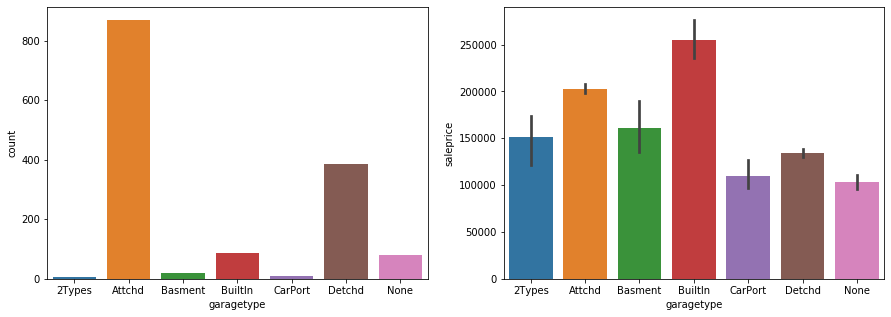

In [21]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.countplot(x='garagetype', data=df)
plt.subplot(122)
sns.barplot(x='garagetype', y='saleprice', data=df)
plt.show()

So there is a decent amount of variation based on the type of garage, but is there much variation between years? Perhaps the garage year built variable doesn't contribute much to the sale price.

In [22]:
df.corr().garageyrblt.yearbuilt

0.8256674841743434

In [23]:
df.corr().yearbuilt.saleprice

0.5228973328794967

In [24]:
df.corr().garageyrblt.saleprice

0.48636167748786213

So, since `garageyrblt` and `yearbuilt` correlate pretty highly with one another (likely indicating that the majority of garages were built the same year as the house - if the house has a garage), I am going to remove the `garageyrblt` variable altogether. Another reason for this is that I would like to keep the integrity of the `garagetype` variable intact. If I were to eliminate the NA rows from `garageyrblt`, I would essentially be eliminating the entire 'None' category from `garagetype`.

In [25]:
df.drop(columns='garageyrblt', inplace=True)

In [26]:
get_df_nulls()

There are no nulls to be found!


And with that said, on to outliers.

## Outliers

Before getting too deep into outliers, it may be of interest to start some general exploration.

A few more continuous variables should be considered categories...

In [27]:
new_cats = ['overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'mosold', 'yrsold']
for var in new_cats:
    df[var] = df[var].astype('category')

In [28]:
df.describe(include='category').iloc[:, 0:17]

,mssubclass,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,9,8,5,8,10,9,112
top,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,2006
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,1260,1445,1220,726,397,821,67


In [29]:
df.describe(include='category').iloc[:, 17:32]

,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,61,6,8,15,16,4,4,5,6,5,5,5,7,7,6
top,1950,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA
freq,178,1141,1434,515,504,872,906,1282,647,649,1311,953,430,1256,1428


In [30]:
df.describe(include='category').iloc[:, 32:]

,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,mosold,yrsold,saletype,salecondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,5,4,7,6,7,4,6,6,3,4,5,5,12,5,9,6
top,Ex,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,6,2009,WD,Normal
freq,741,1365,1335,735,1360,690,870,605,1311,1326,1340,1453,1179,1406,253,338,1267,1198


In [31]:
df.describe().iloc[:, :14]

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068
std,22.027677,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000
75%,79.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000


In [32]:
df.describe().iloc[:, 14:27]

,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904
std,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000


In [33]:
df.describe().iloc[:, 27:]

,miscval,saleprice
count,1460.000000,1460.000000
mean,43.489041,180921.195890
std,496.123024,79442.502883
min,0.000000,34900.000000
25%,0.000000,129975.000000
50%,0.000000,163000.000000
75%,0.000000,214000.000000
max,15500.000000,755000.000000


Things to take note:
- There are a large number of continuous variables where the mass majority of the data is 0 (since majority of houses don't have these features - also for corresponding categorical variables the datatype is generally 'None')
- The amount of very low numbers and for some the inclusion of very large numbers will mean outliers all over the place - these will need to be dealt with
- What if we could model a way that checked if features were present first, then based on if they were or weren't, they would use a certain form of a model...hmm

I'll use the z-score method of removing outliers, it is essential to remove outliers as they can highly influence the model.

In [34]:
def get_outliers(data, columns):
    outlier_indexes = []
    for col in columns:
        ser_col = data[col]
        mean = ser_col.mean()
        sd = ser_col.std()
        outliers_mask = data[(data[col] > mean + 3*sd) | (data[col] < mean - 3*sd)].index
        outlier_indexes += [x for x in outliers_mask]
    return list(set(outlier_indexes))

In [35]:
outliers_df = get_outliers(df, df.describe().columns)
df.drop(outliers_df, inplace=True)

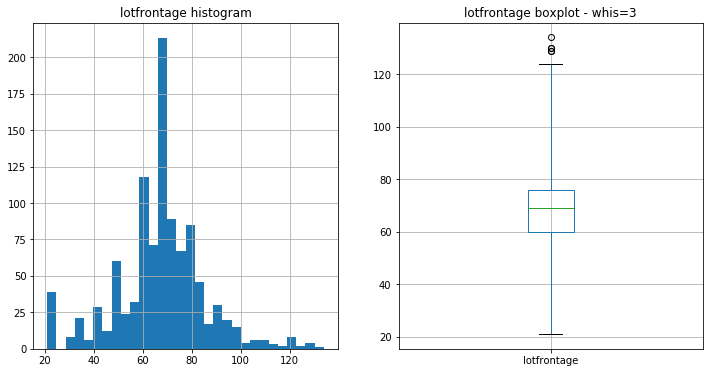

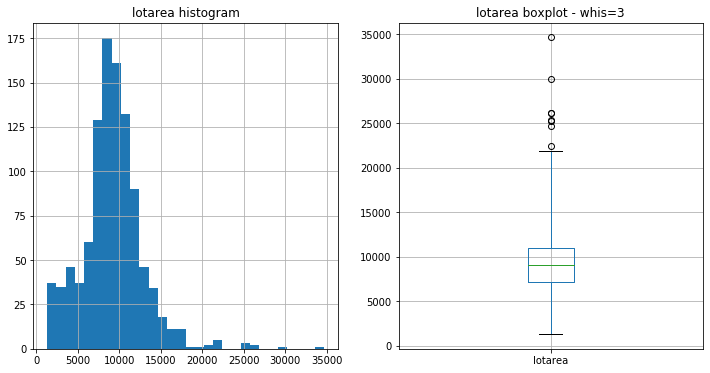

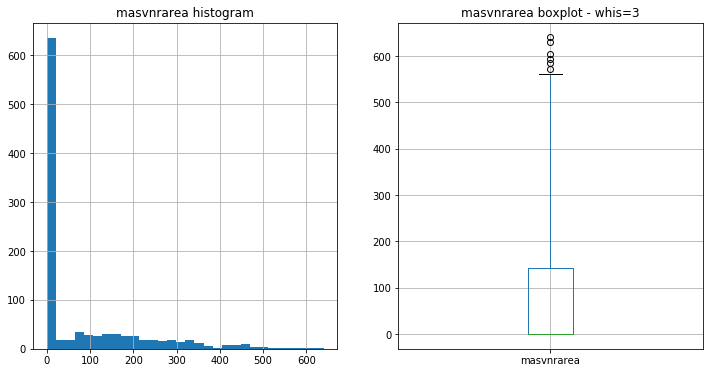

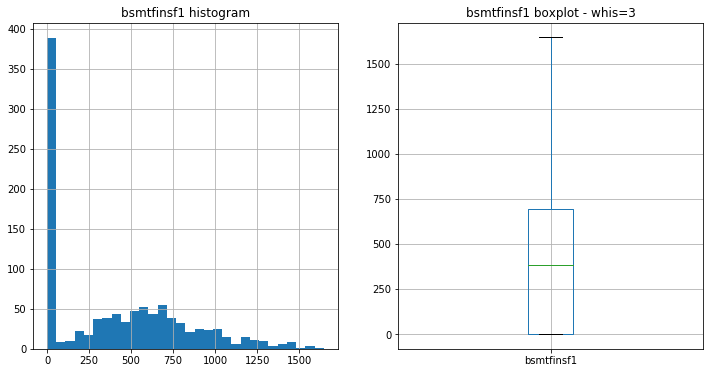

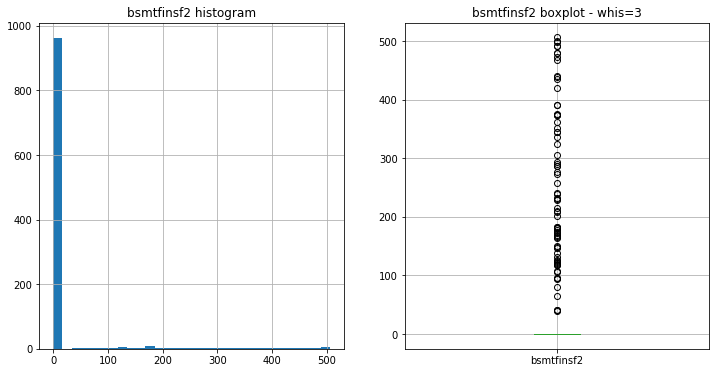

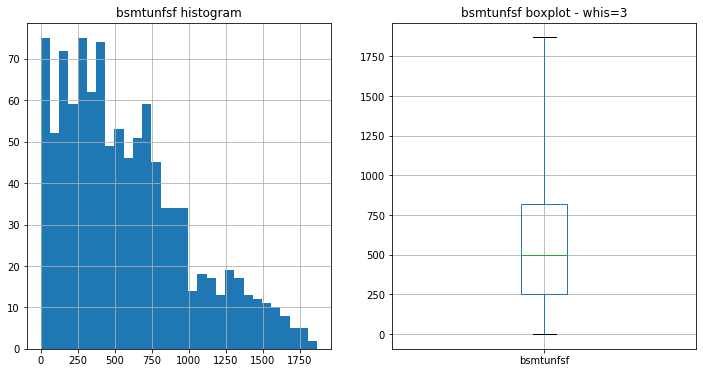

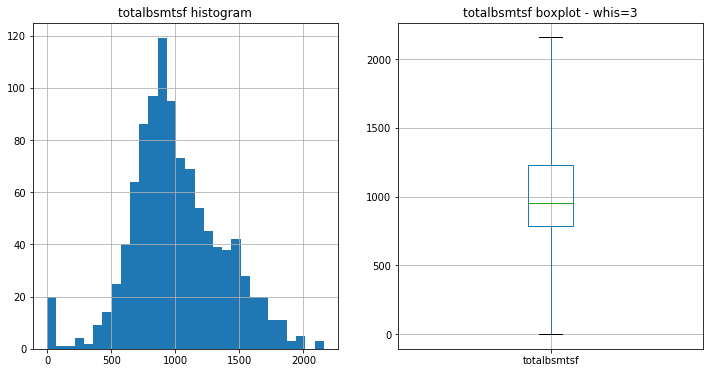

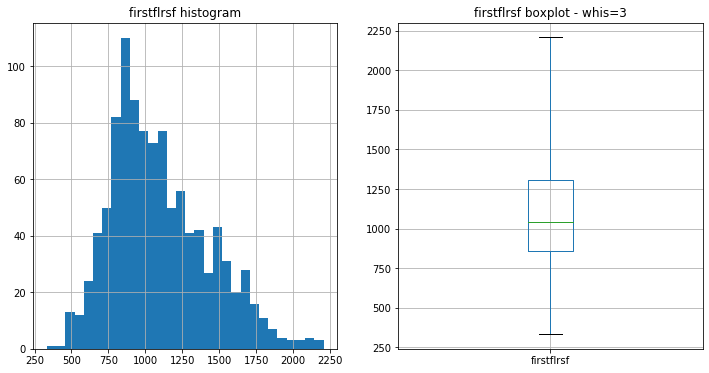

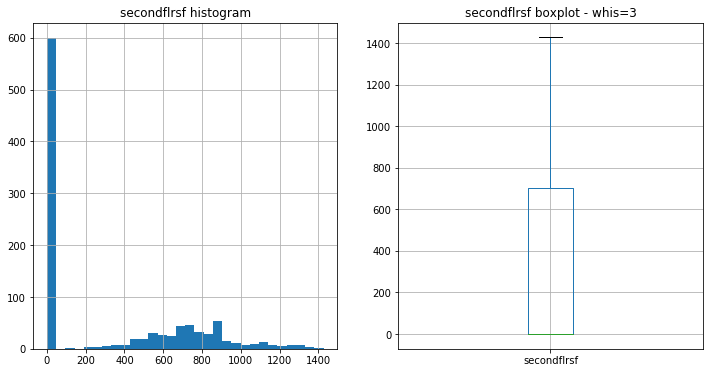

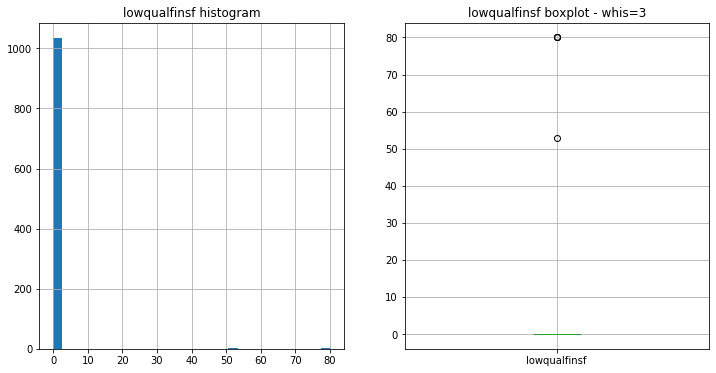

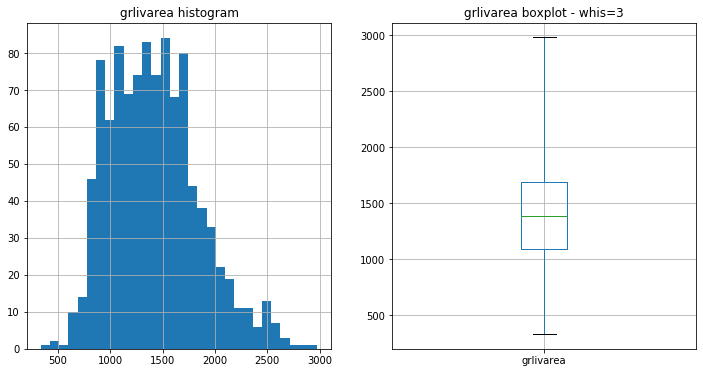

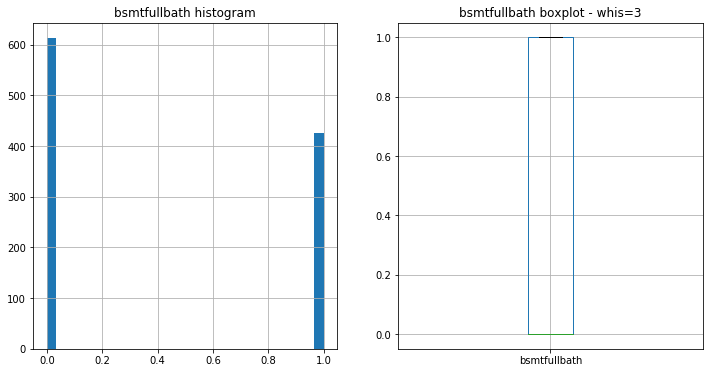

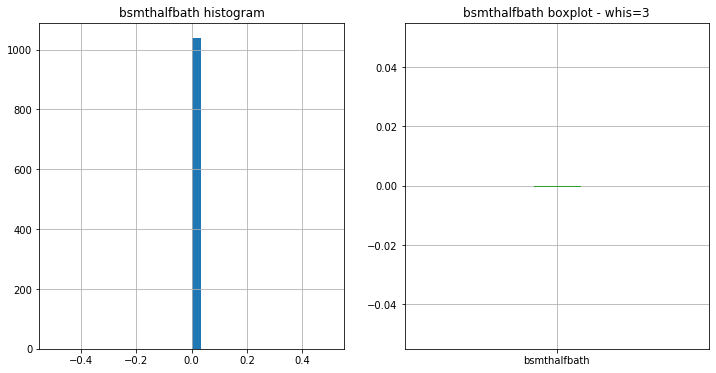

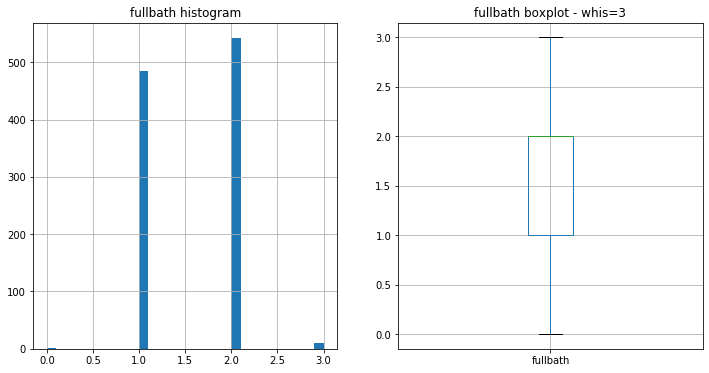

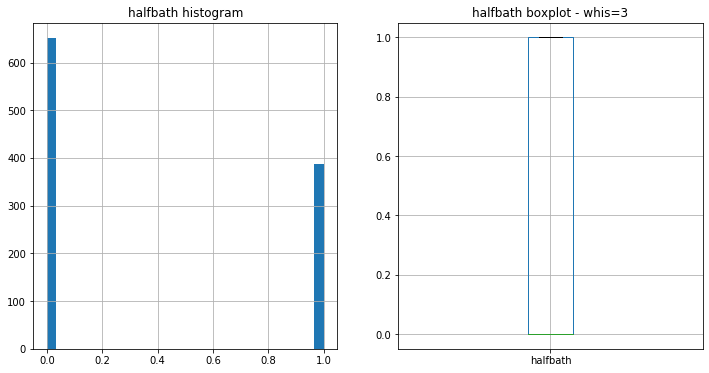

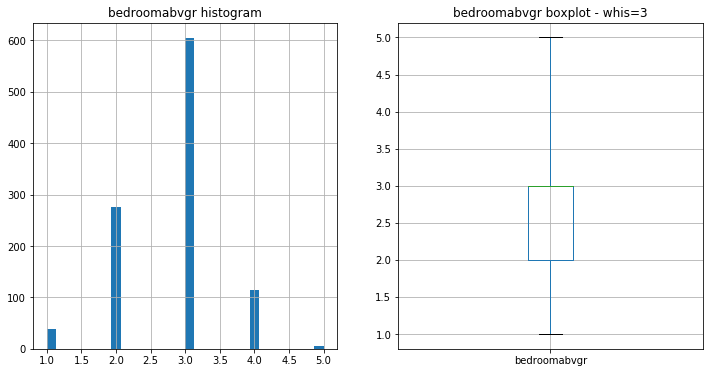

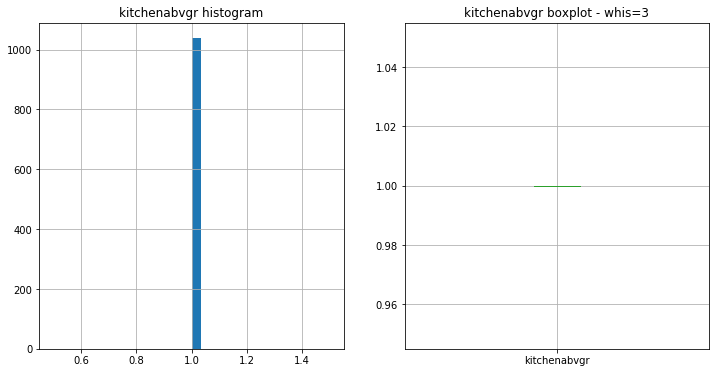

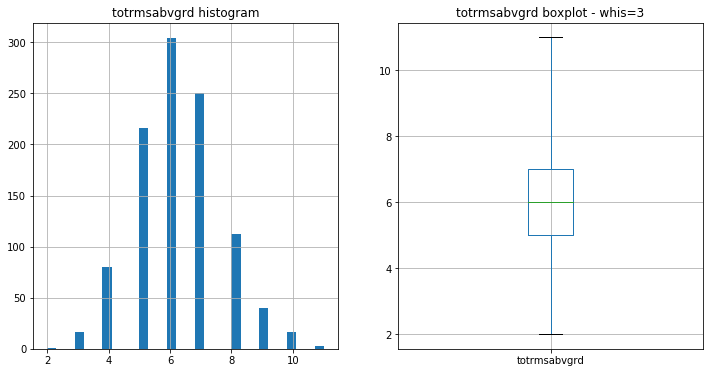

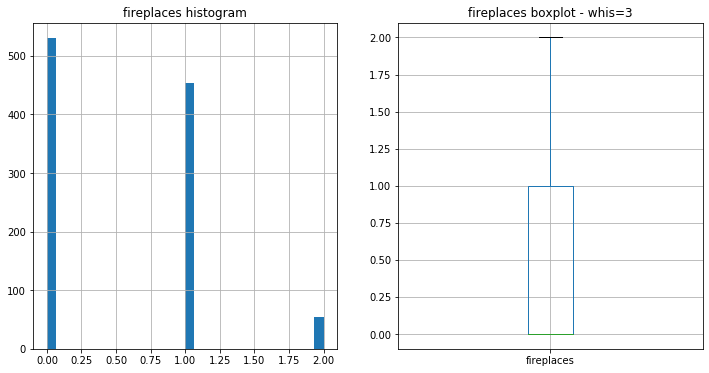

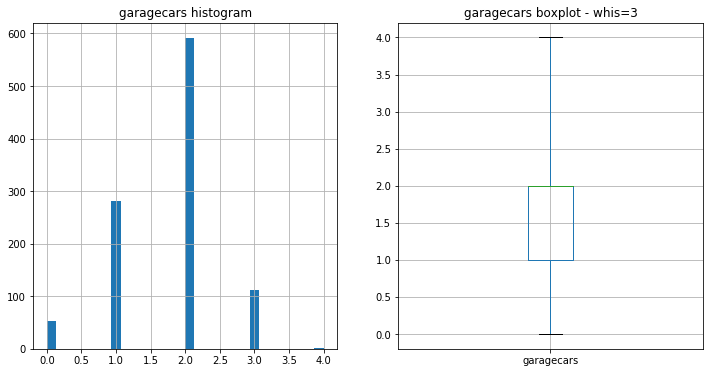

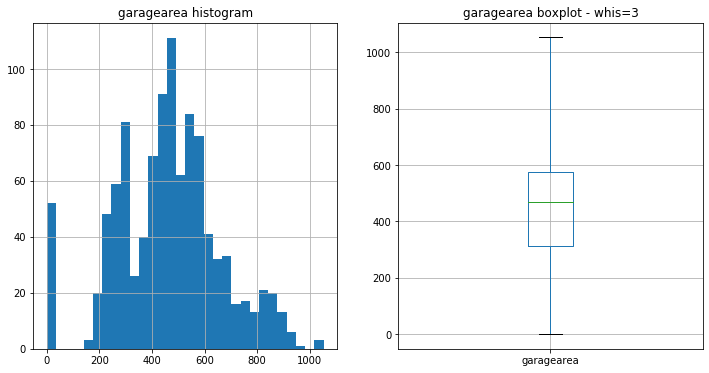

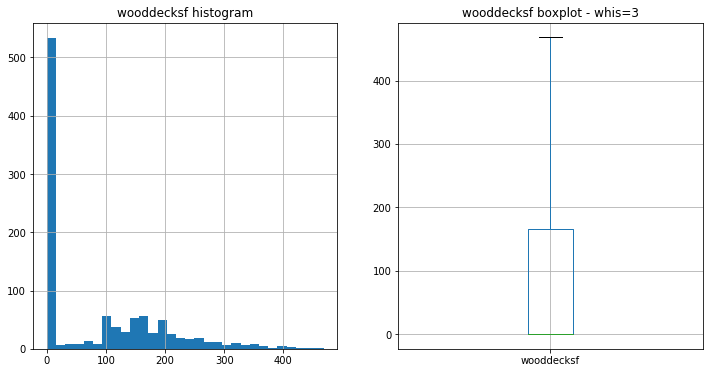

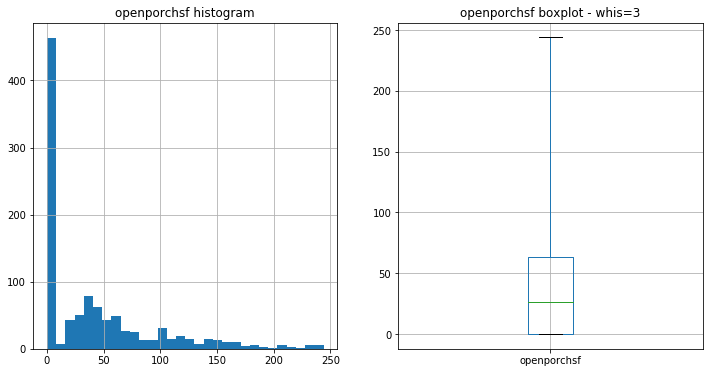

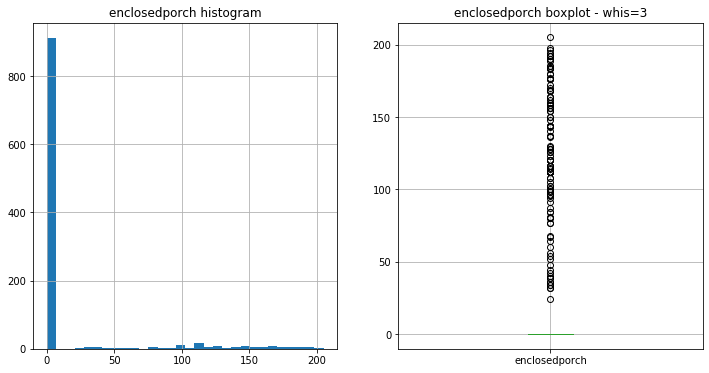

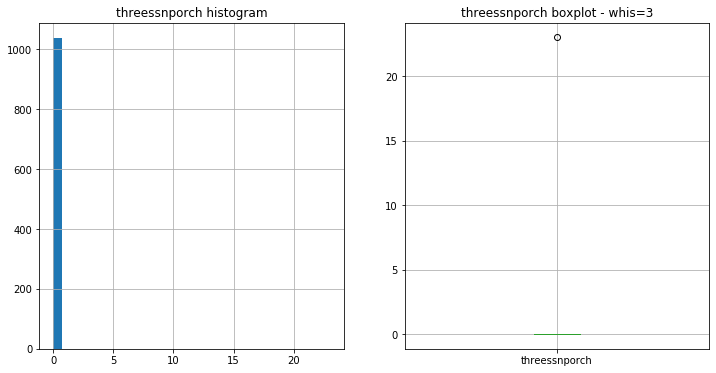

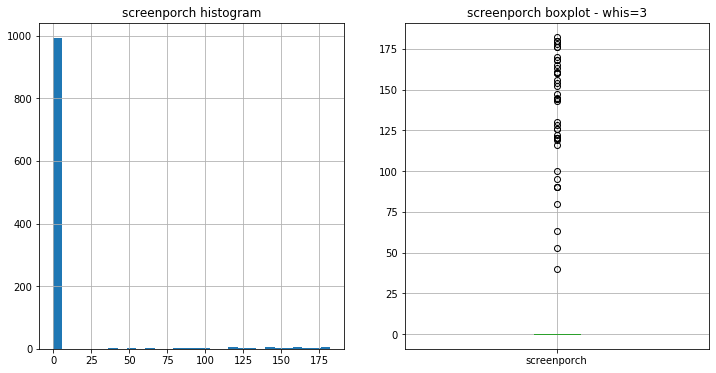

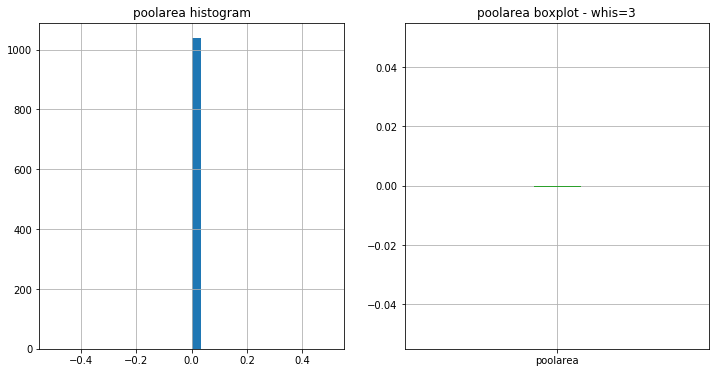

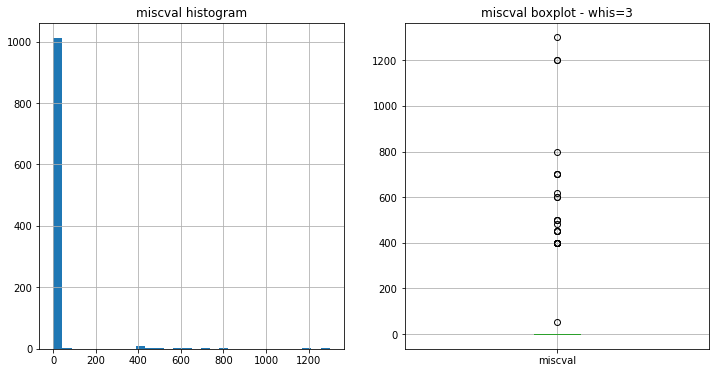

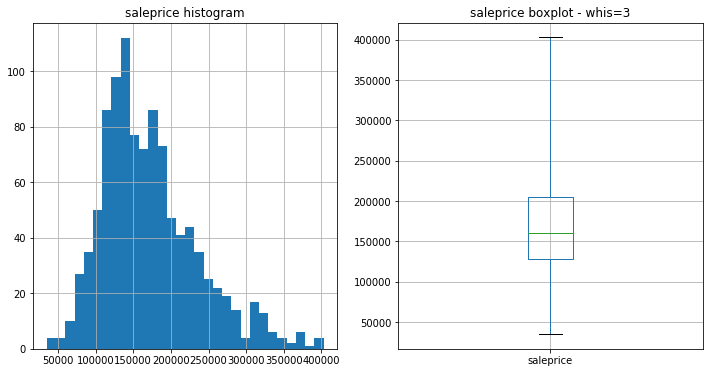

In [36]:
for col in df.describe().columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    df[col].hist(bins=30)
    plt.title('{} histogram'.format(col))
    plt.subplot(122)
    df.boxplot(column=col, whis=3)
    plt.title('{} boxplot - whis=3'.format(col))
    plt.show()

The brunt of the outliers have now been dealt with, removing outliers using the IQR/Tukey's method would probably have eliminated too many data points. Now, let's start digging into the data.

# 2.2: Exploring Data

First off, let's look for correlations in the data.

After eliminating some of the extreme values there are a handful of variables that now have basically zero variability. These won't help at all in determining the sales price of a house so they will be removed.

In [37]:
for col in df.describe().columns:
    if df[col].std() == 0:
        df.drop(columns=col, inplace=True)

## Univariate Analysis

In [38]:
df.shape
df.shape[0]/df.shape[1]

13.657894736842104

Theoretically, we should still have enough observations if we used every single variable in the dataset.

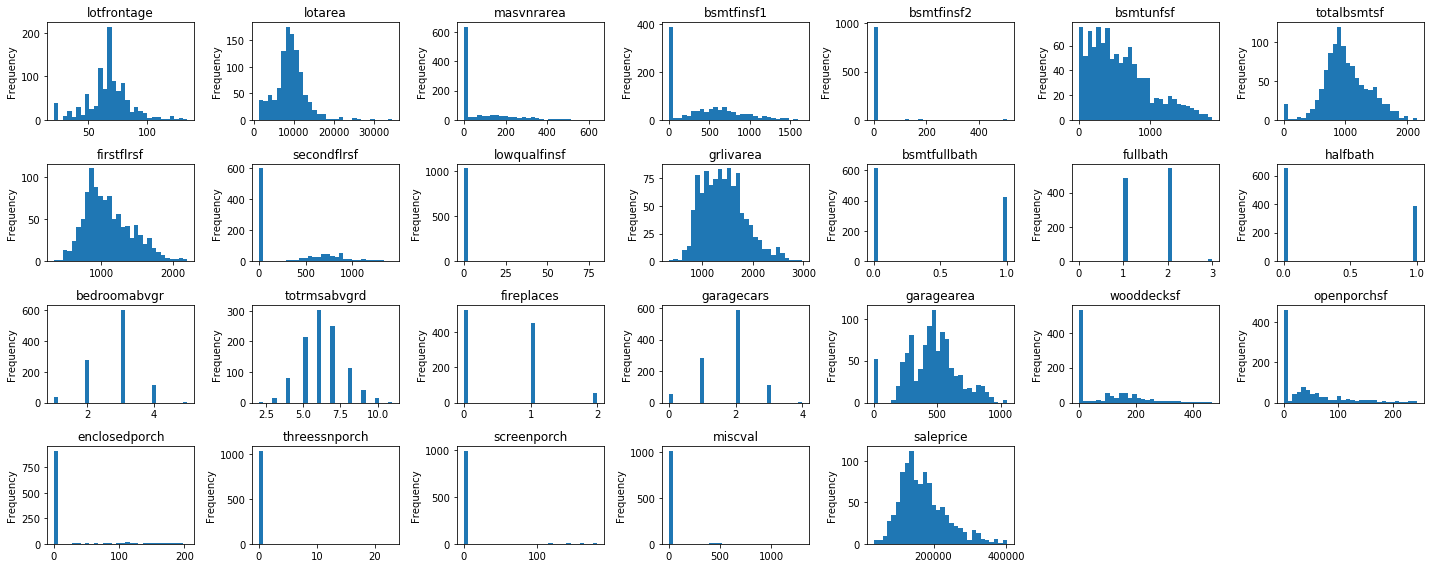

In [39]:
plt.figure(figsize=(20, 8))
for i, col in enumerate(df.describe().columns, 1):
    plt.subplot(4, 7, i)
    df[col].plot(kind='hist', bins=30)
    plt.title(str(col))
plt.tight_layout()
plt.show()

It appears there are a decent number of 'like-normal' variables, those being `lotfrontage`, `lotarea`, `totalbsmtsf`, `firstflrsf`, `grlivarea`, `garagearea`,  `bedroomabvgr`, `totrmsabvgrd`, `garagecars` and also our target `saleprice`.

In [40]:
50/7

7.142857142857143

In [41]:
8/3*8

21.333333333333332

In [42]:
len(df.describe(include='category').columns)

50

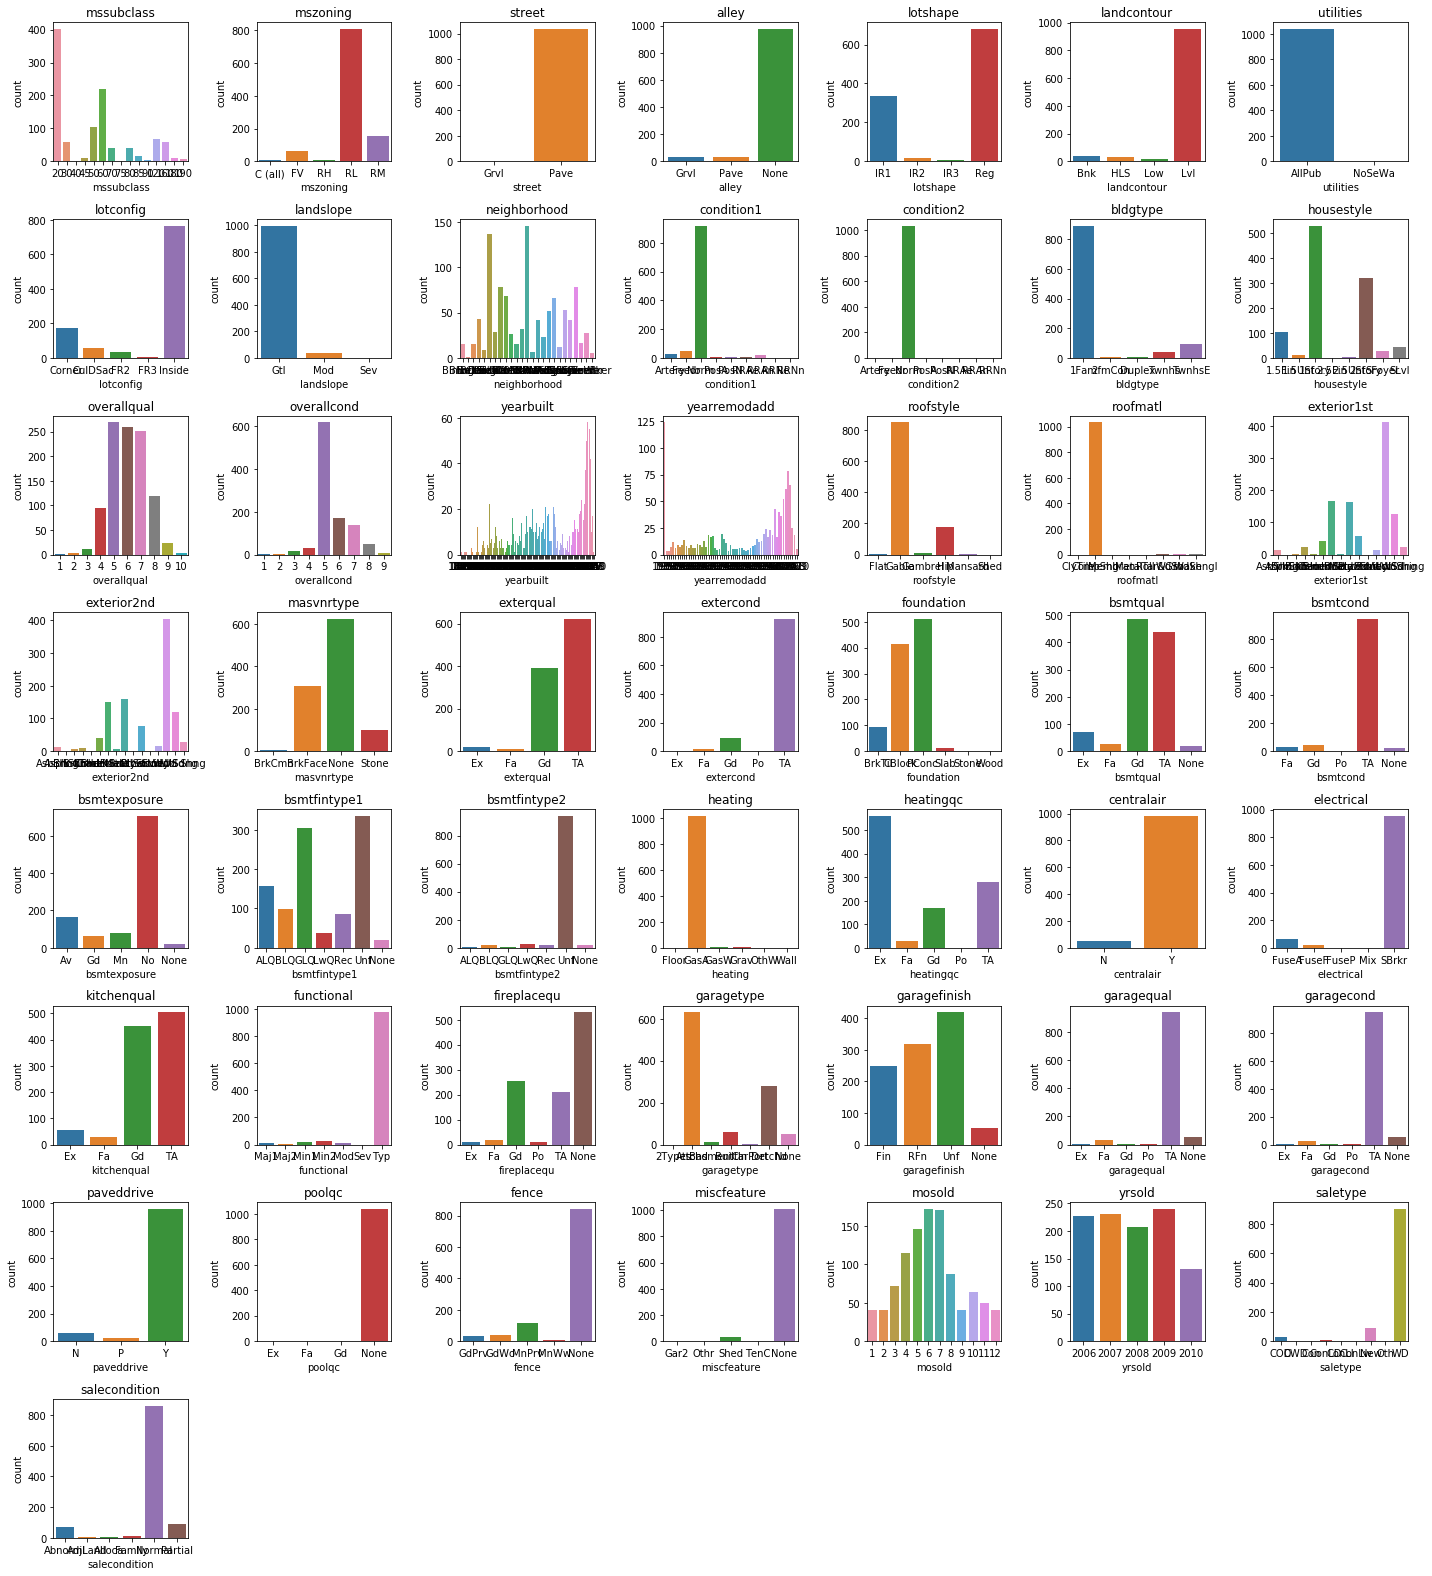

In [43]:
plt.figure(figsize=(20, 22))
for i, col in enumerate(df.describe(include='category').columns, 1):
    plt.subplot(8, 7, i)
    sns.countplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

There are a number of variables above that show a lot of differences in the distributions of the categorical variables, definitely potential for some bias here as these variables are not evenly spread.

## Bivariate Analysis

**Continuous-continuous:**

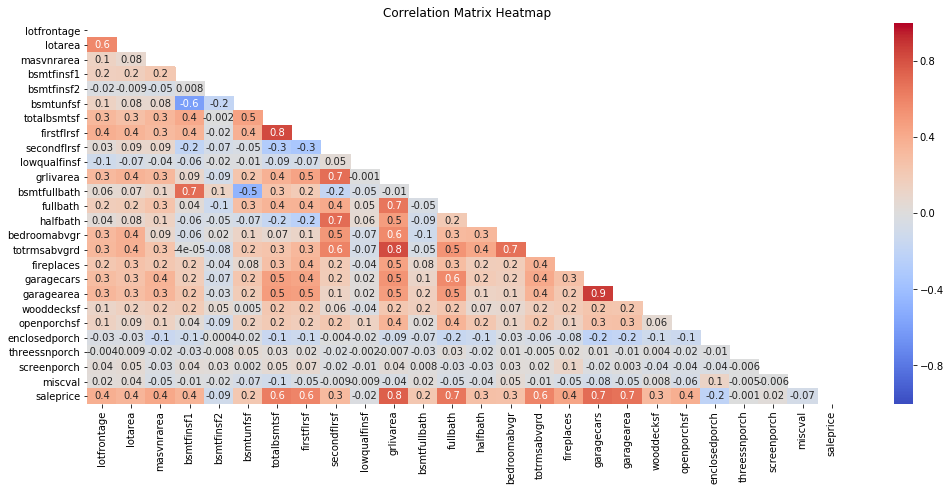

In [44]:
mask = np.triu(df.corr())
plt.figure(figsize=(17,7))
sns.heatmap(df.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(df.corr().shape[1], 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

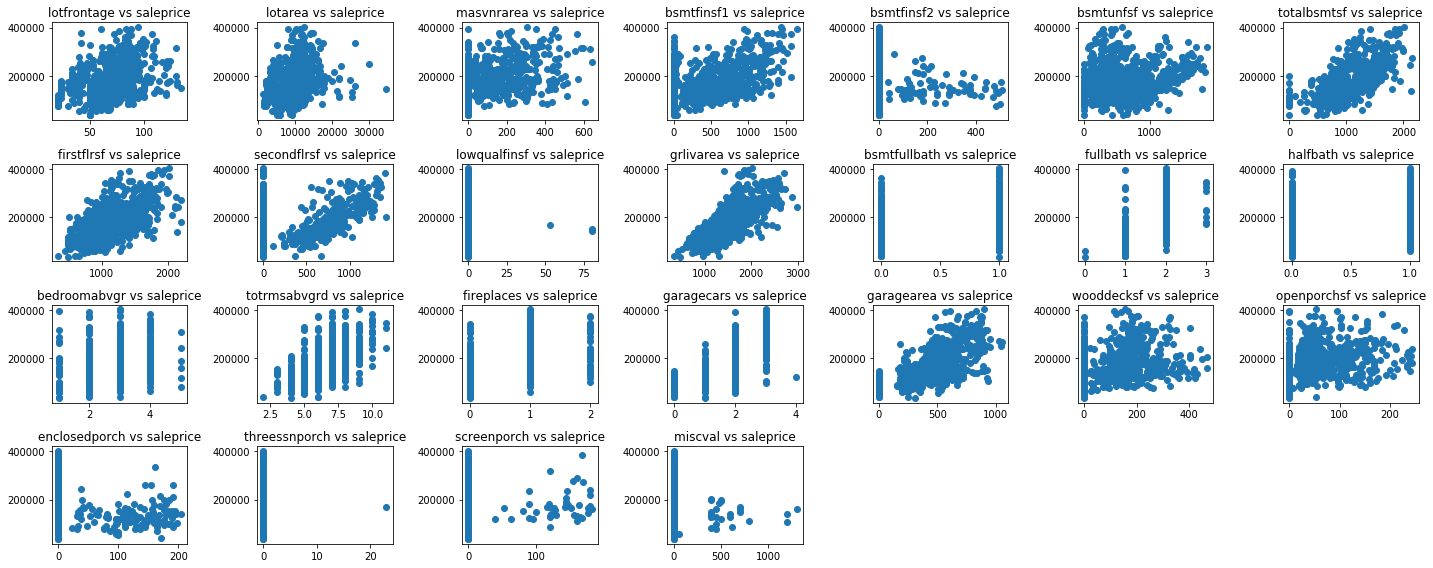

In [45]:
plt.figure(figsize=(20, 8))
for i, col in enumerate(df.describe().columns[:-1], 1):
    plt.subplot(4, 7, i)
    plt.scatter(x=df[col], y=df.saleprice)
    plt.title('{} vs saleprice'.format(col))
plt.tight_layout()
plt.show()

Based on the above, there are a number of variables that appear to be correlated with saleprice. Namely:
- Given the presence of a basement, `bsmtfinsf1` is highly correlated to `saleprice`
- `totalbsmtsf` is highly correlated to `saleprice`
- `firstflrsf` is hihgly correlated to `saleprice`
- Given the presence of a second floor, `secondflrsf` is highly correlated with `saleprice`
- `grlivarea` is highly correlated with `saleprice`
- `totrmsabvgrd` appears to be correlated with `saleprice`
- `garagearea` appears to be highly correlated with `saleprice`

These may be of special interest when heading to the feature engineering phase.

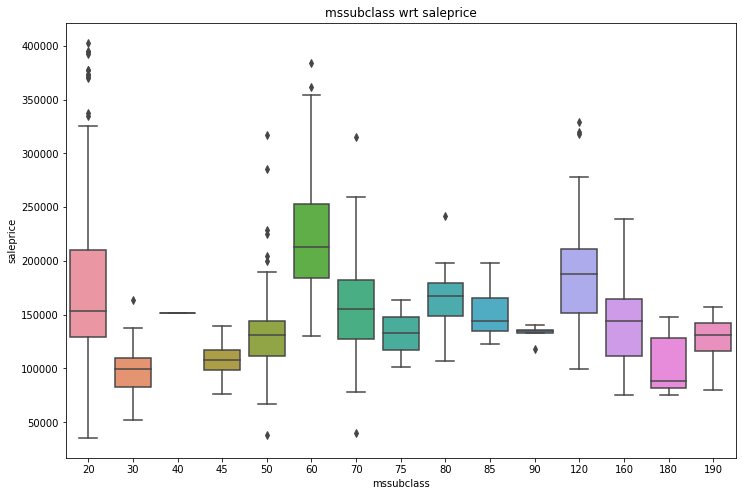

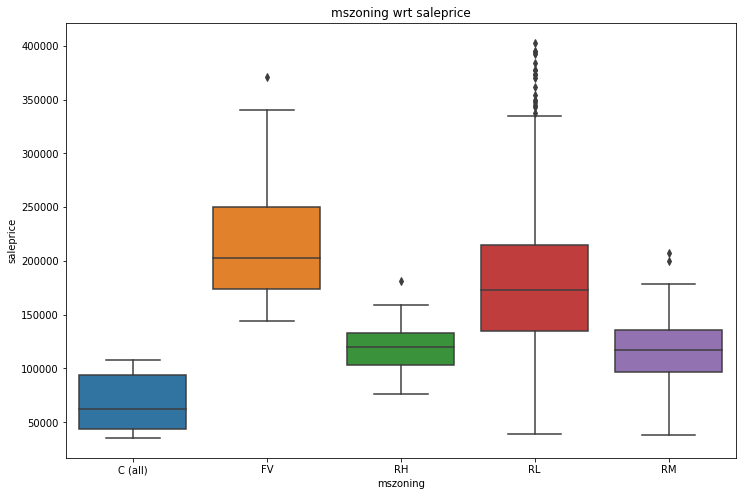

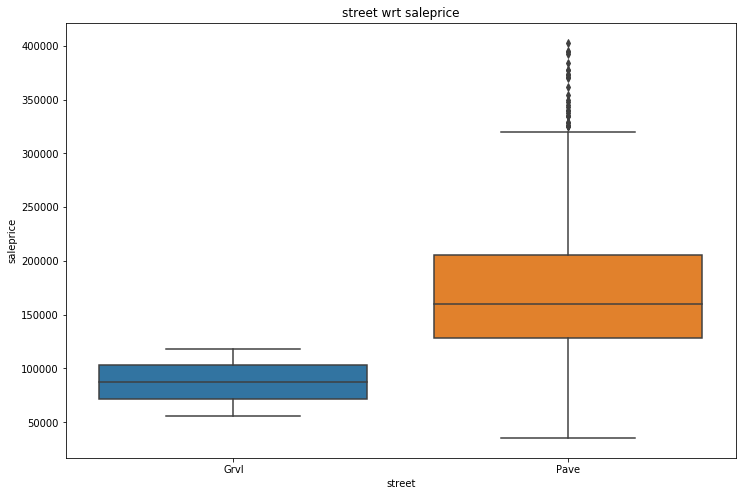

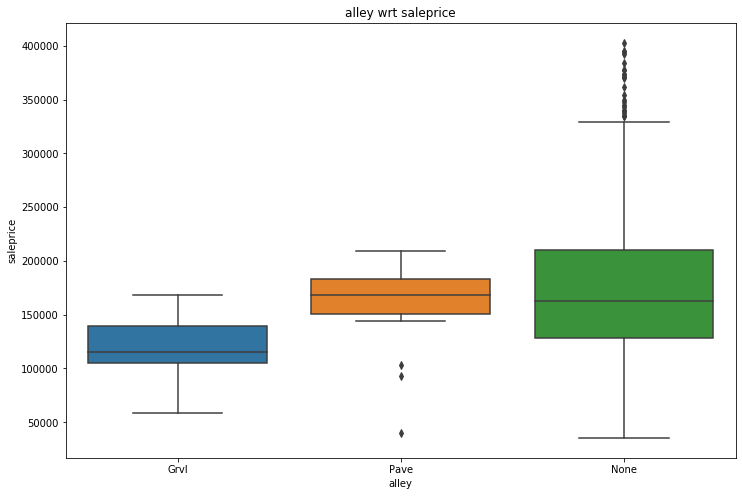

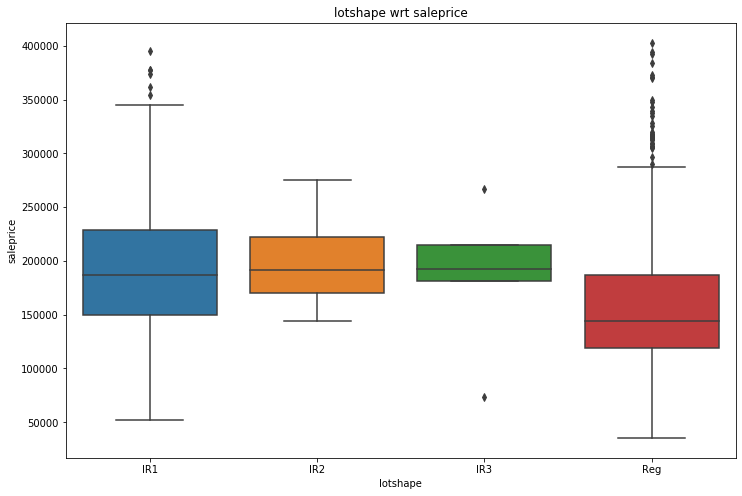

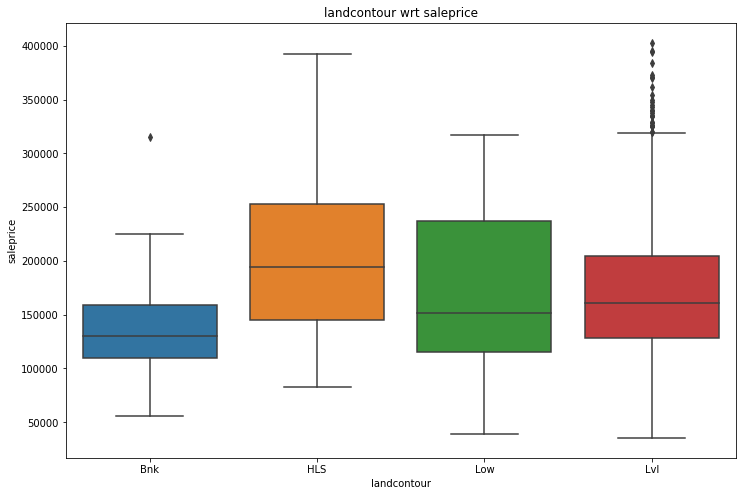

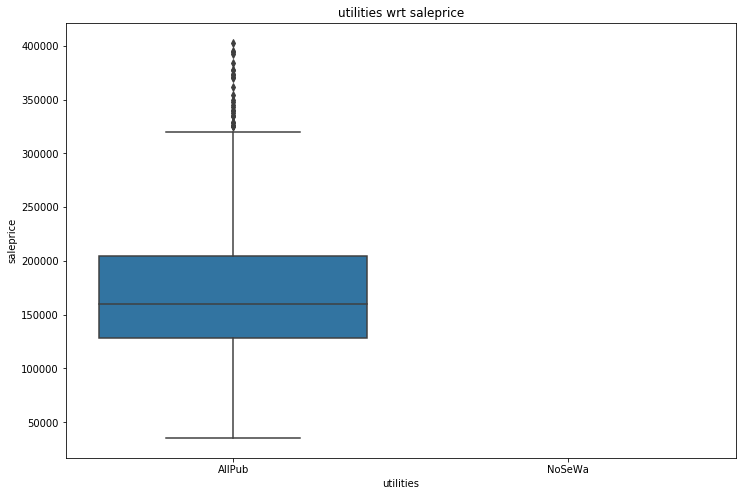

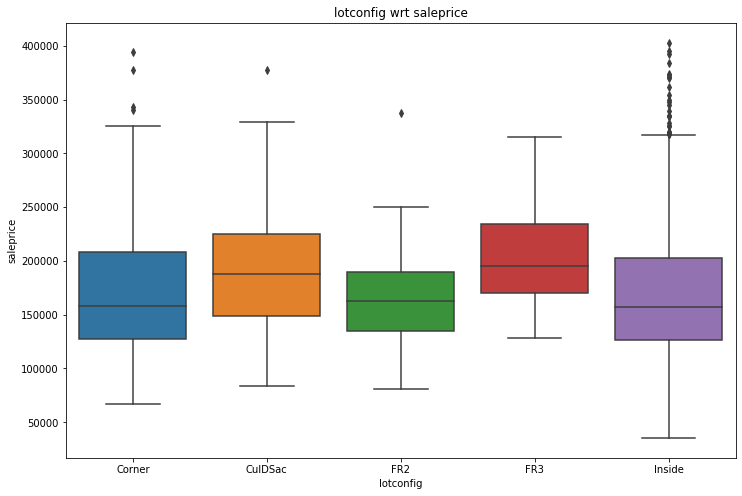

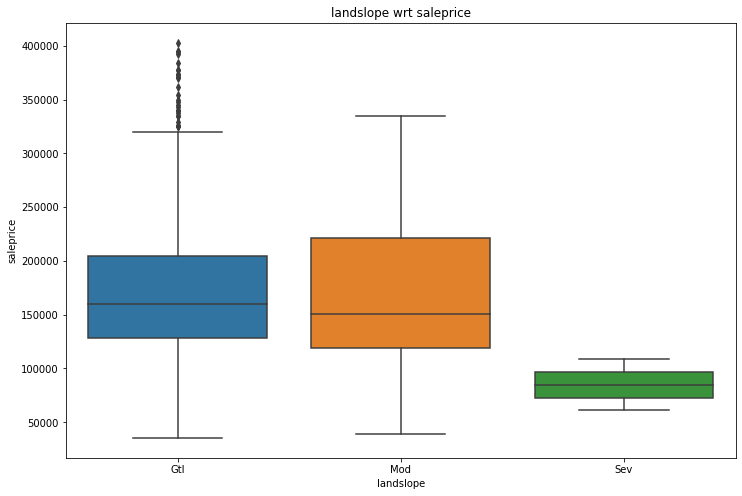

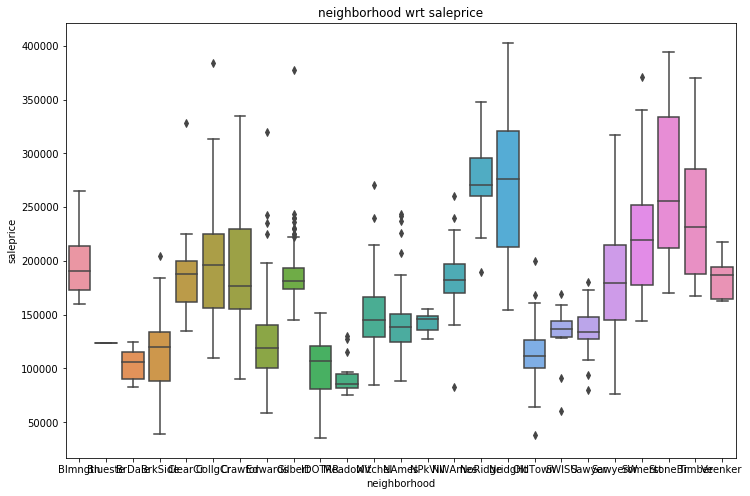

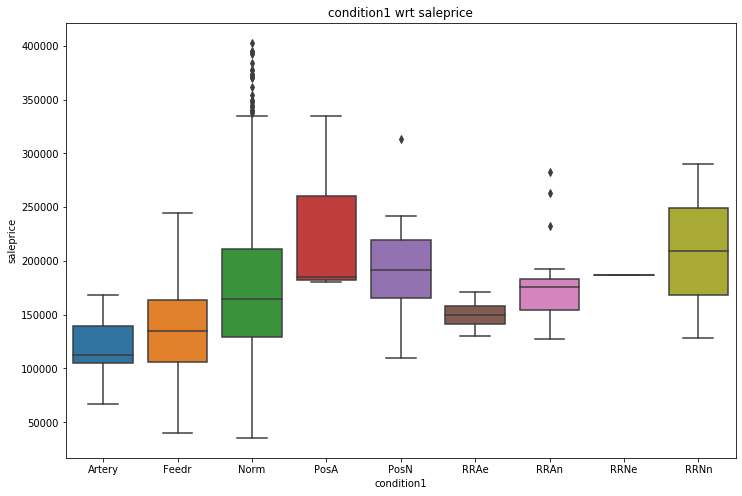

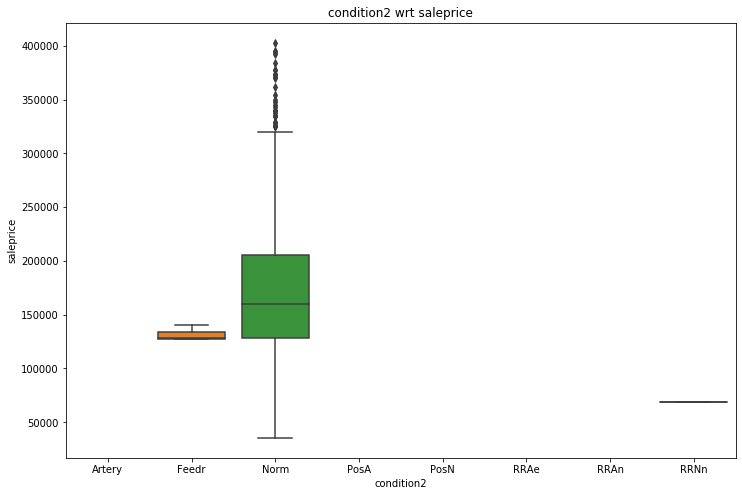

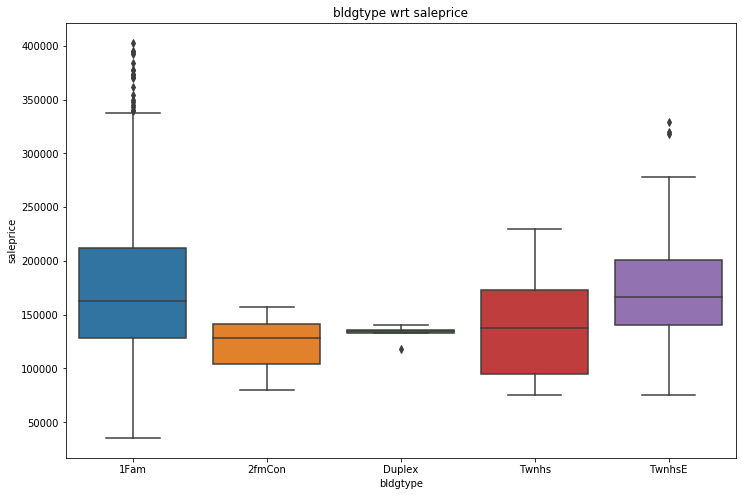

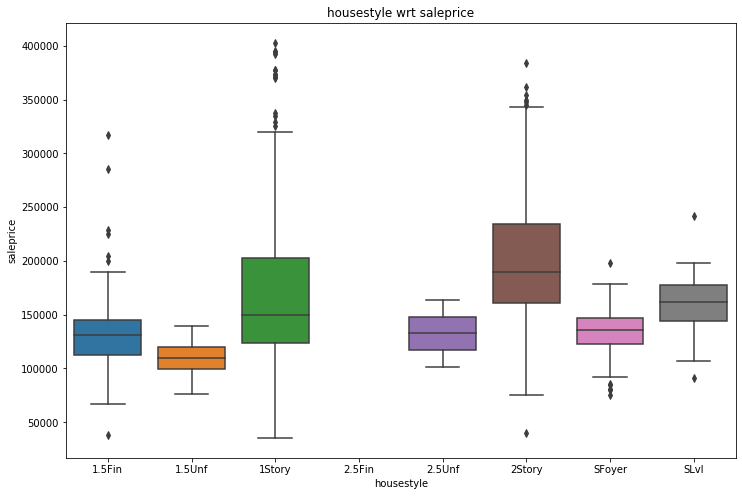

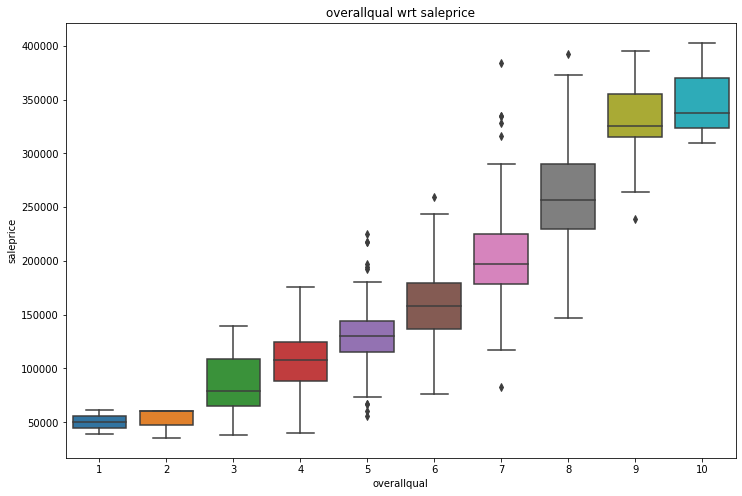

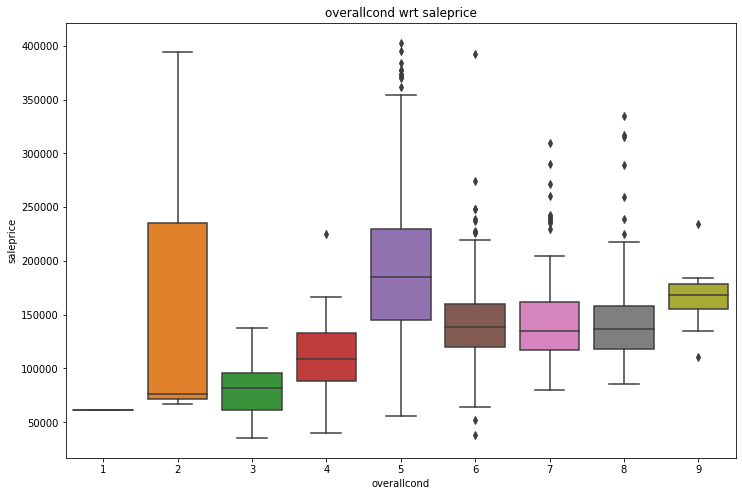

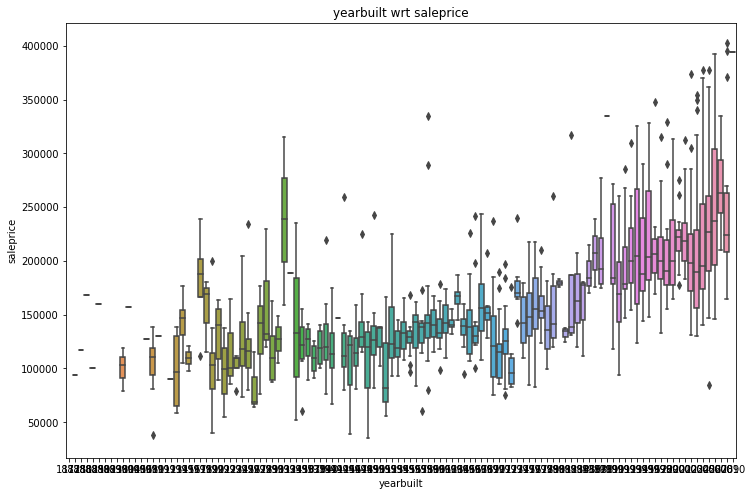

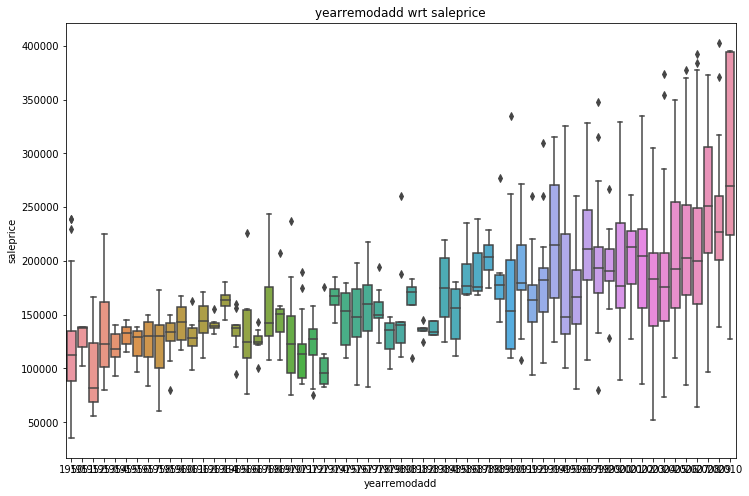

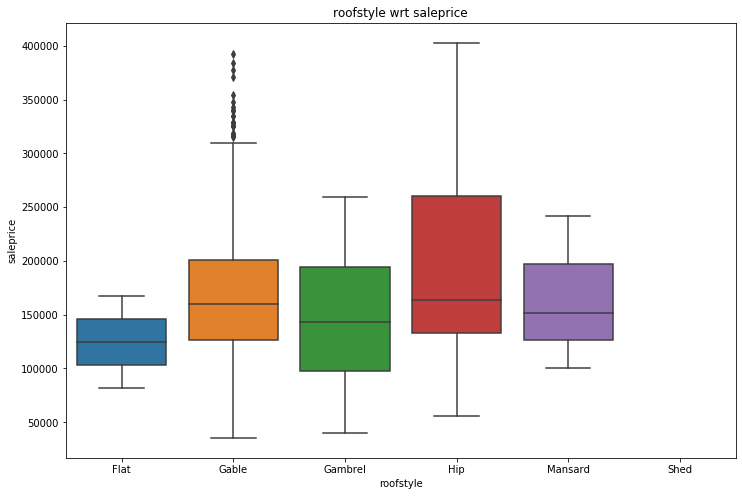

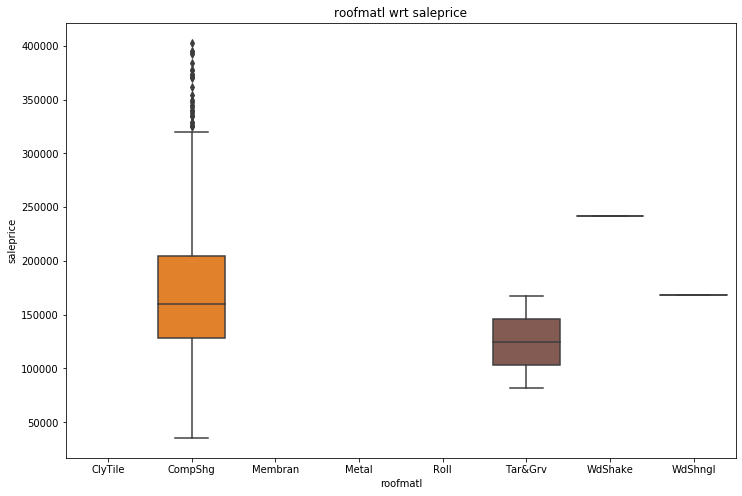

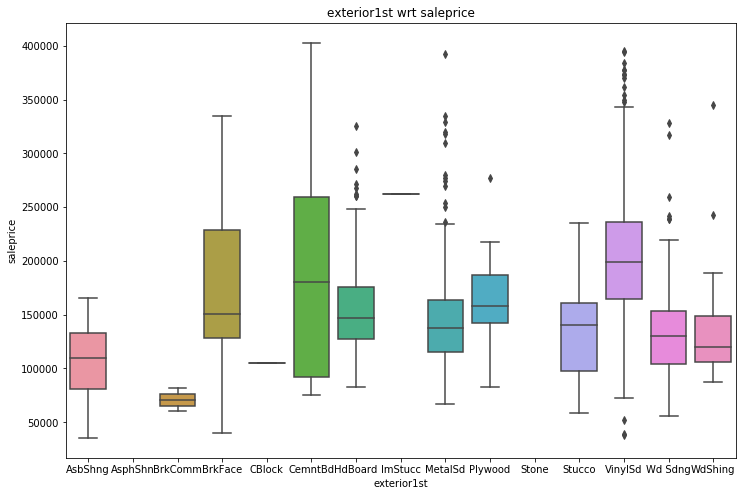

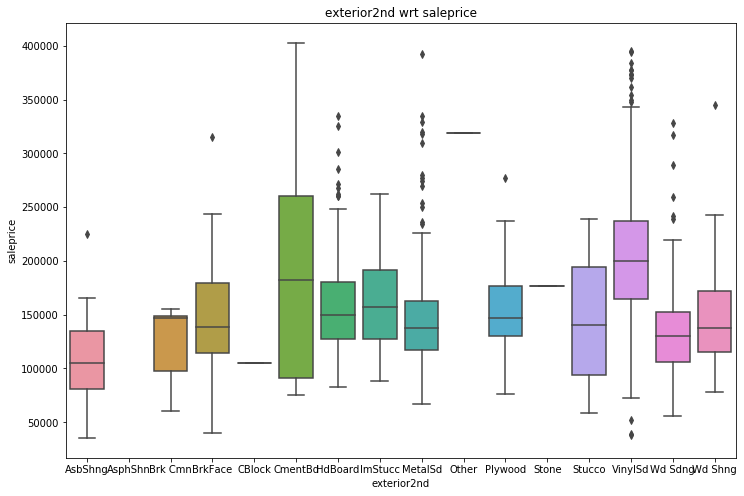

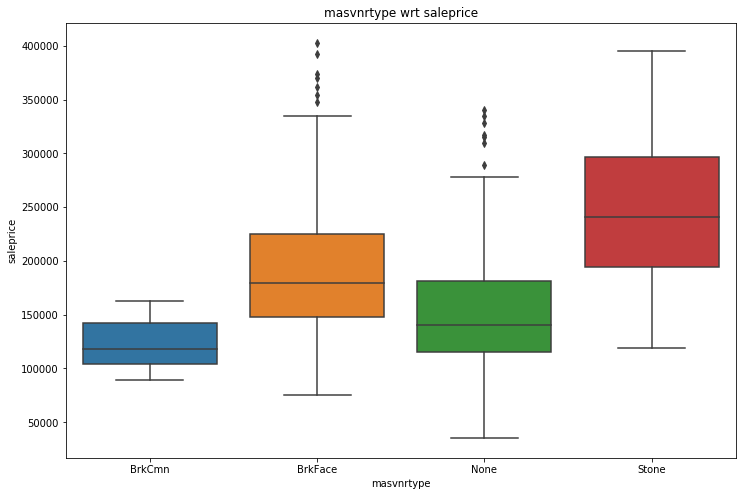

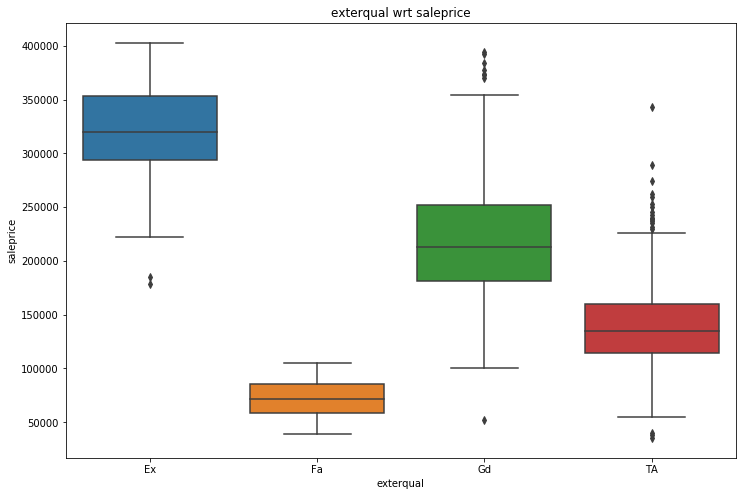

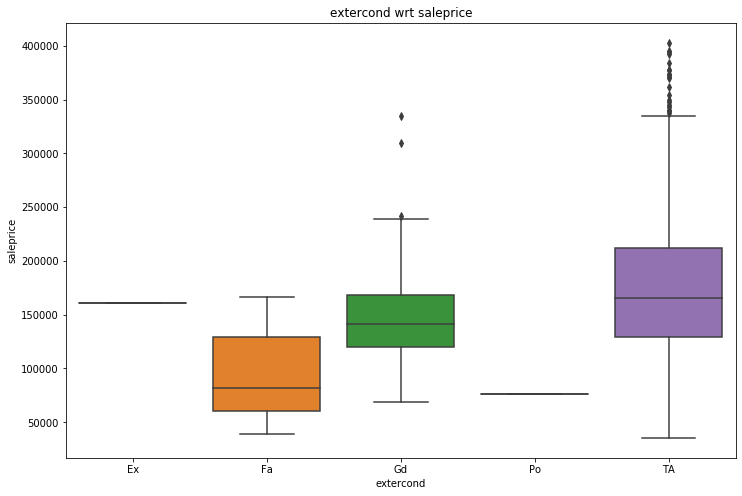

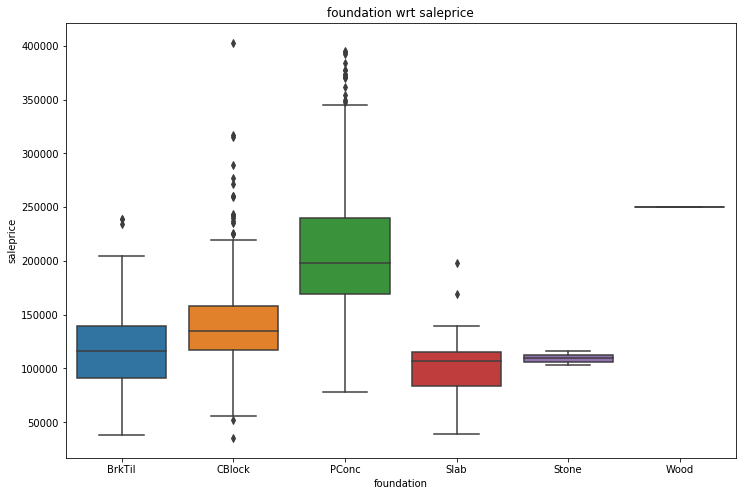

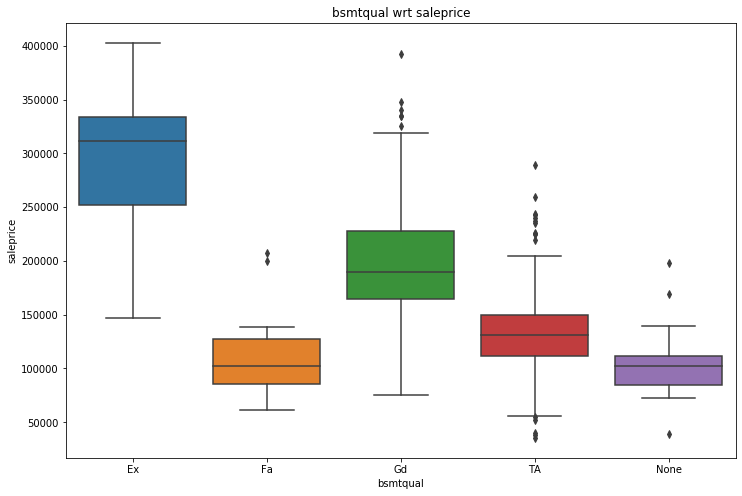

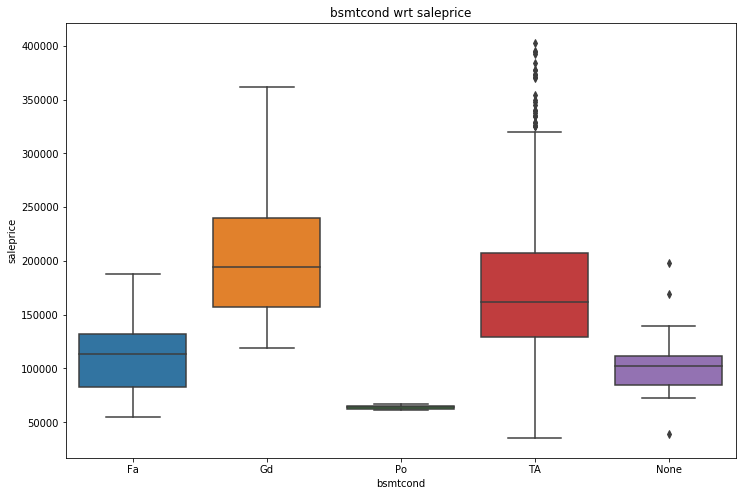

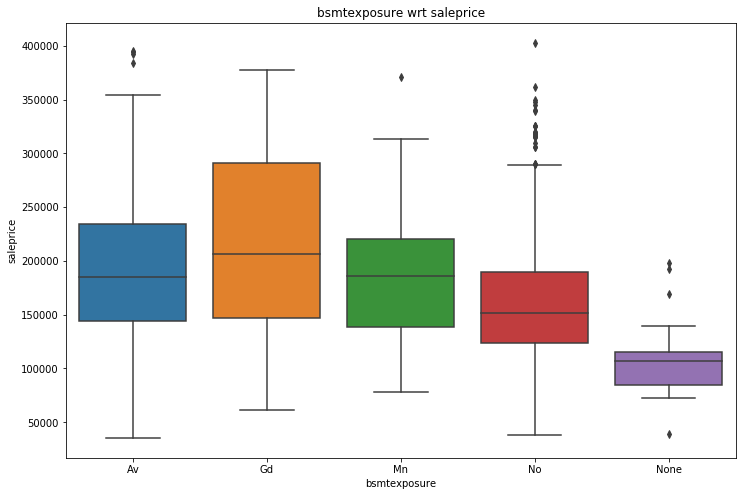

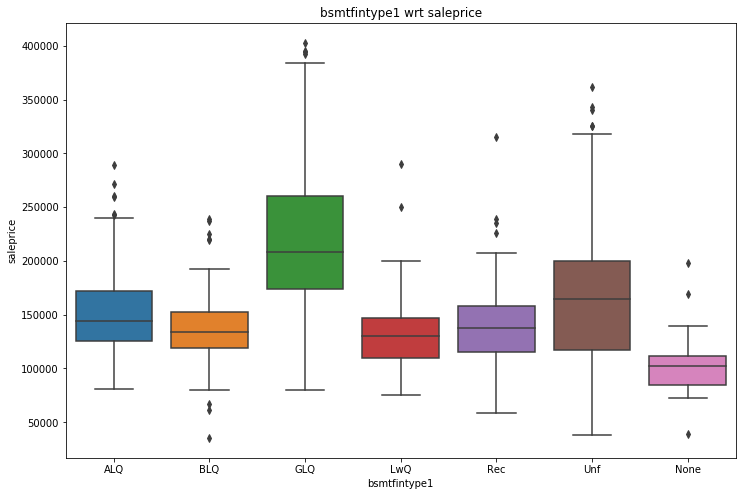

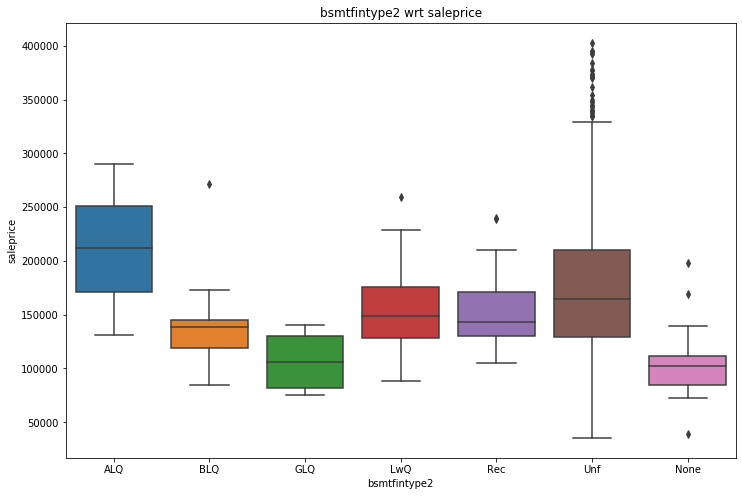

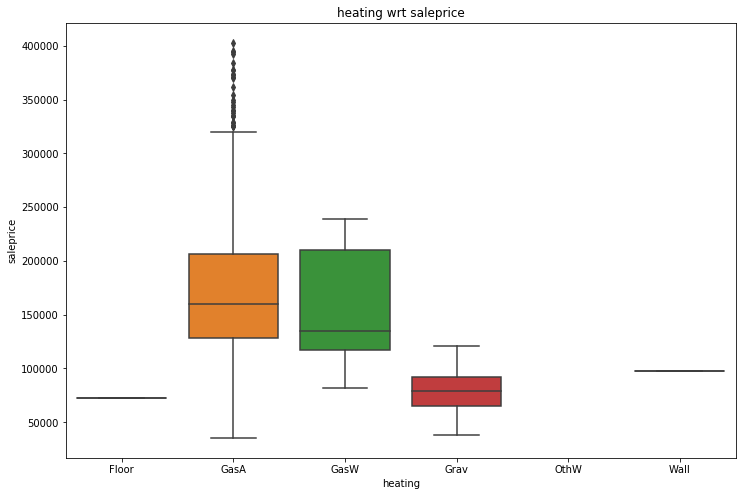

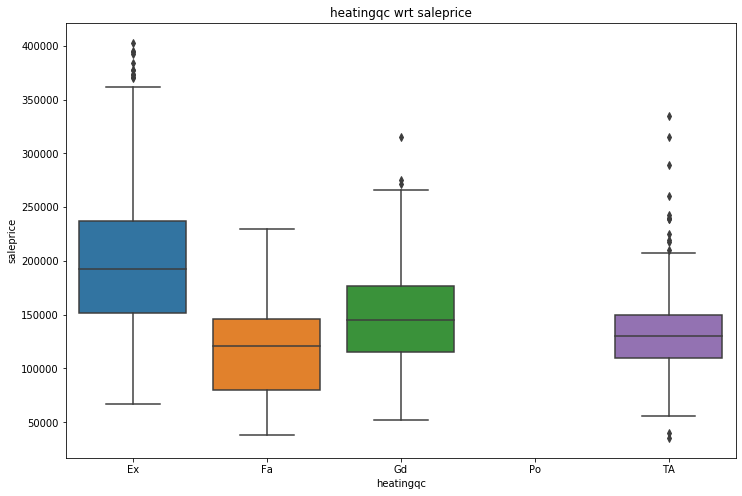

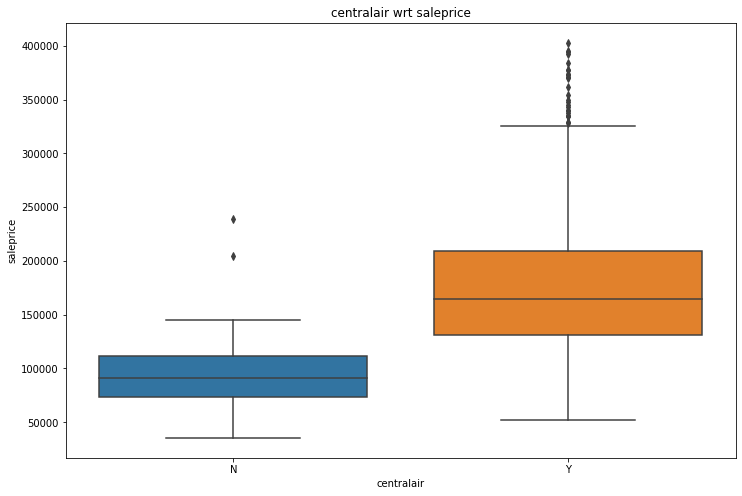

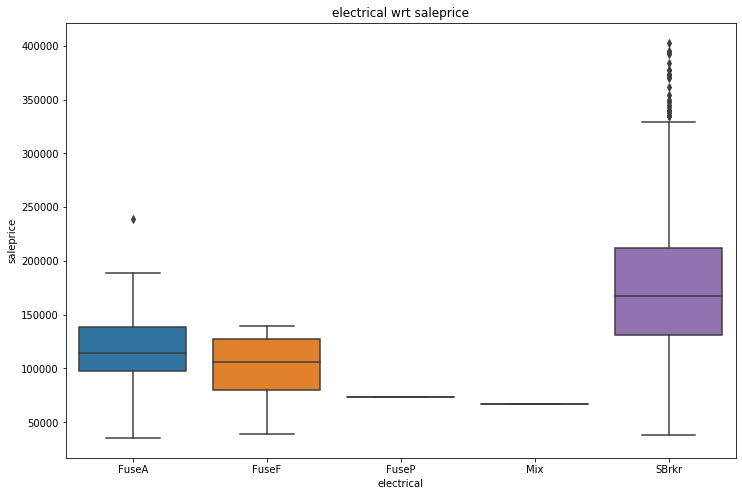

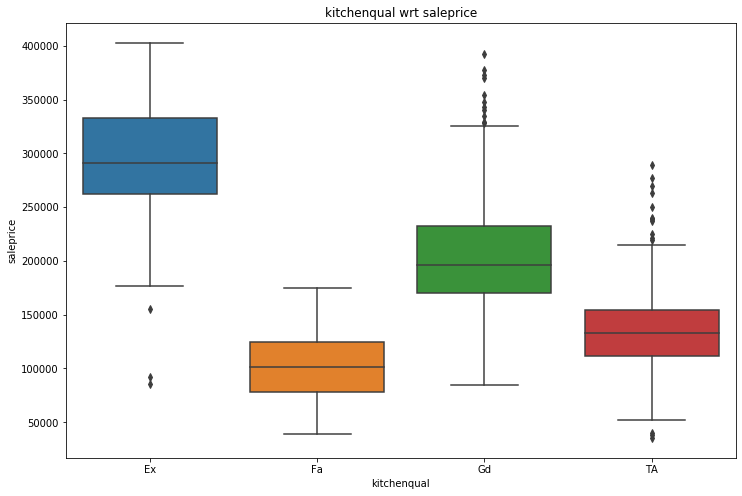

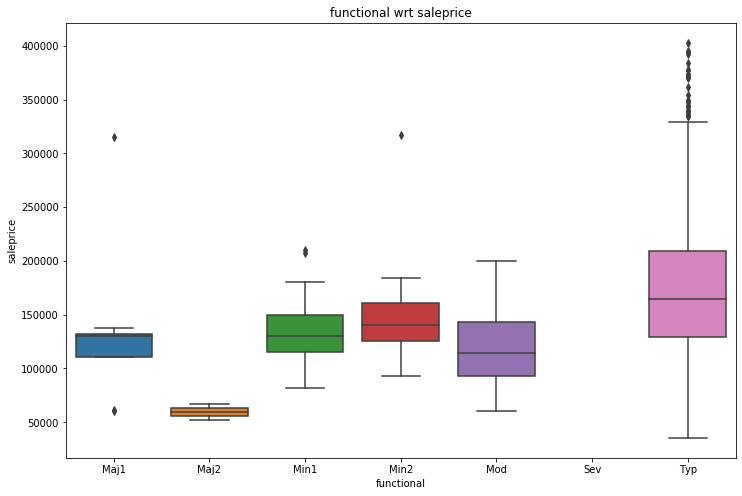

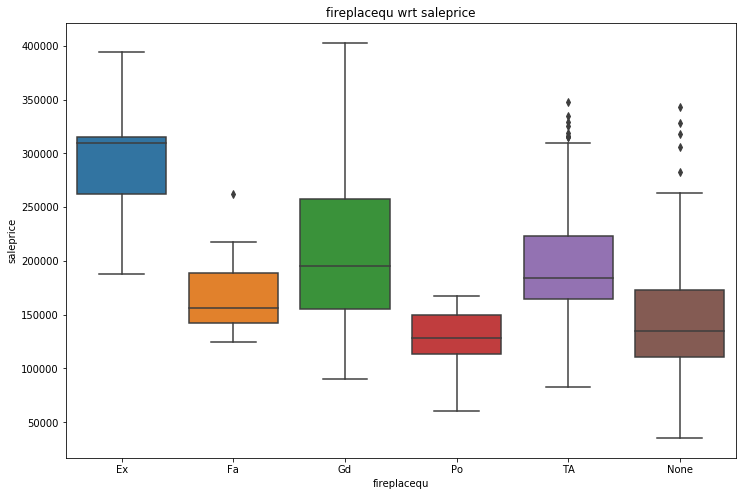

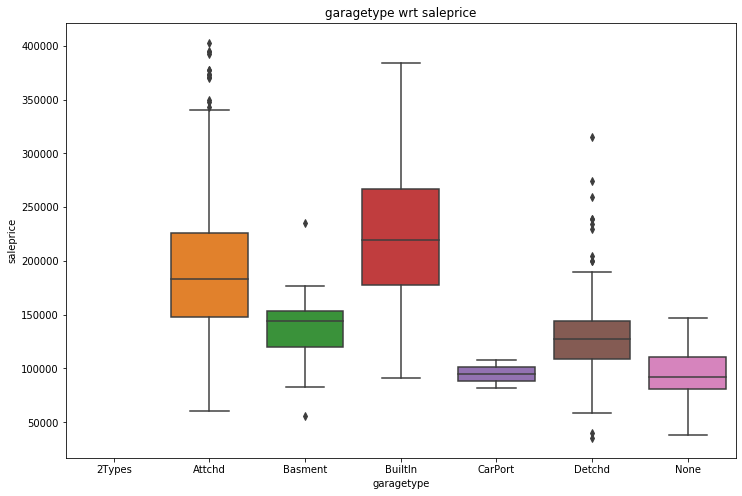

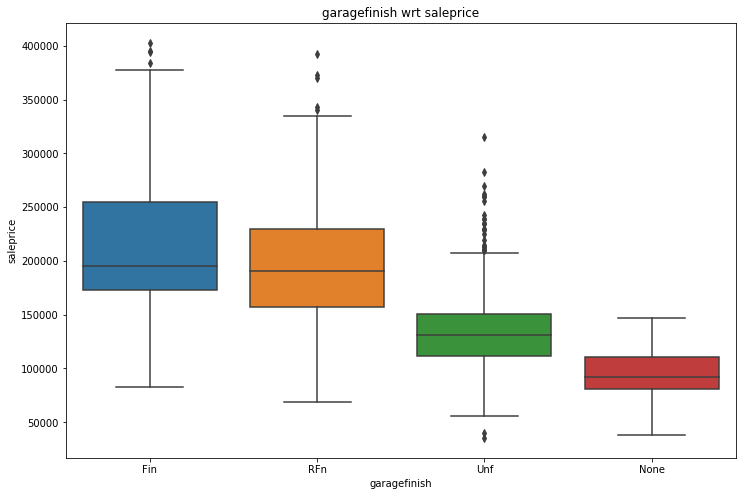

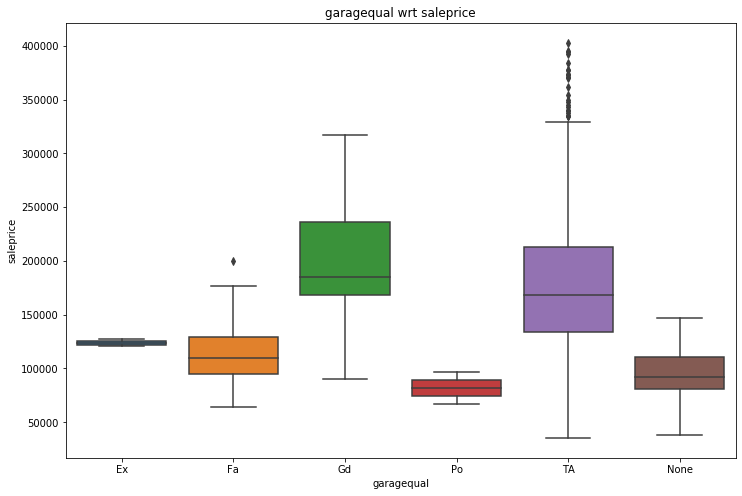

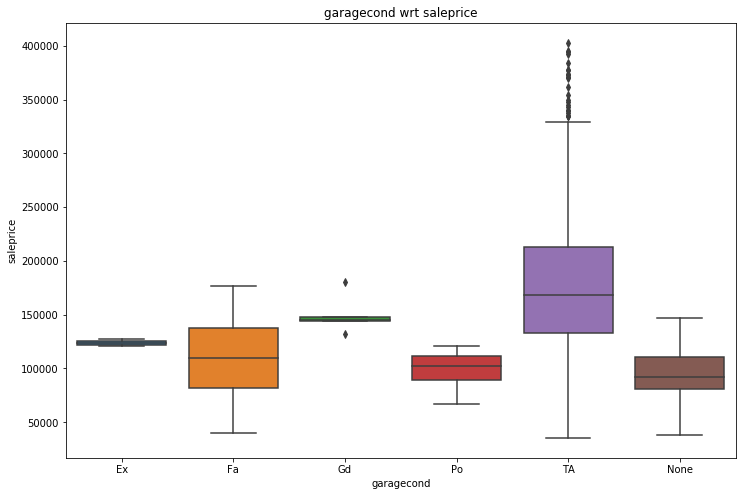

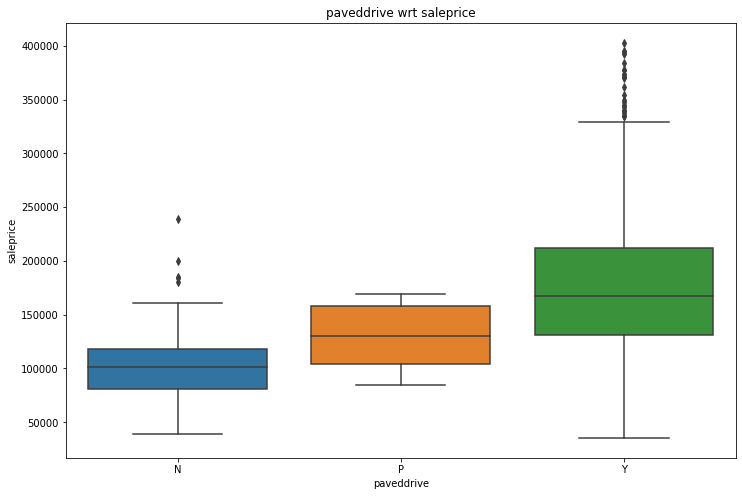

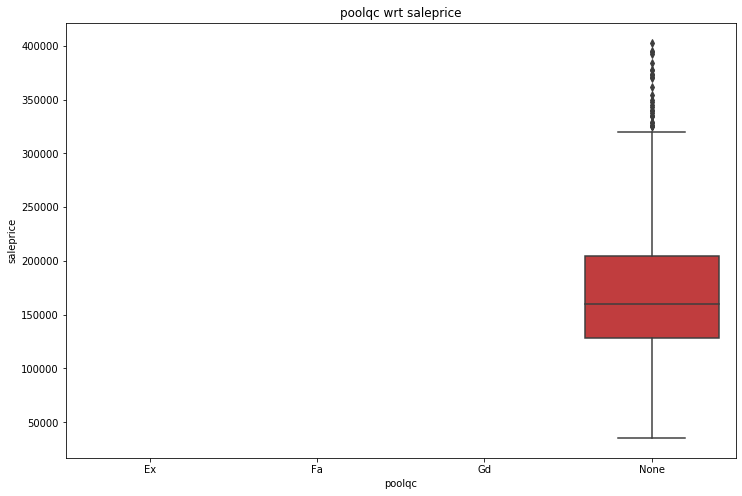

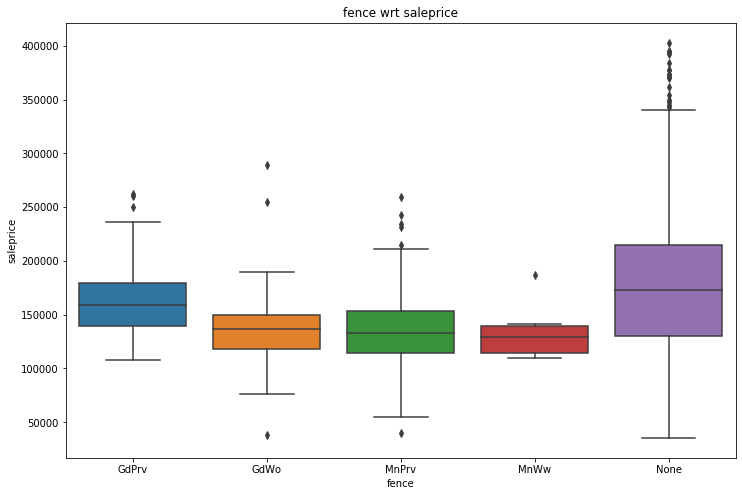

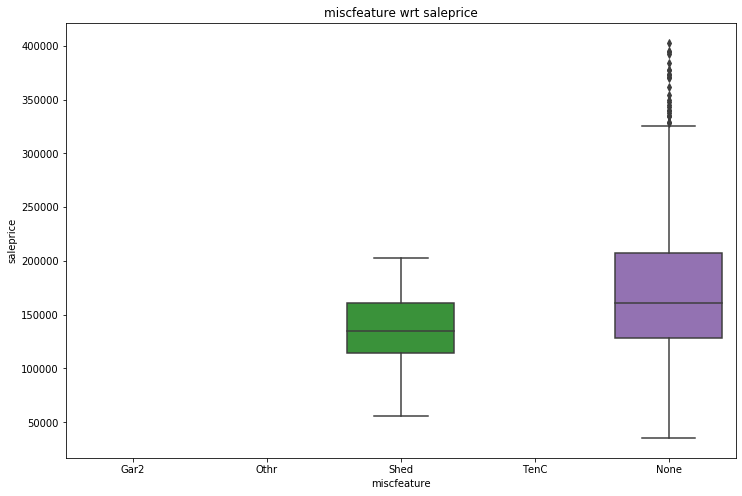

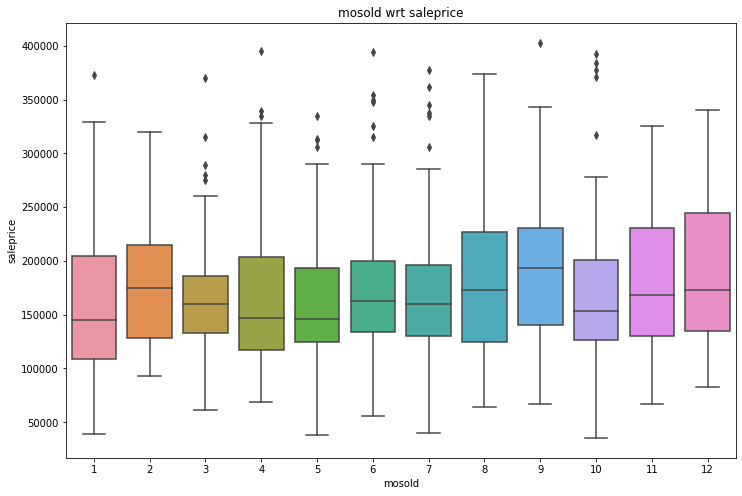

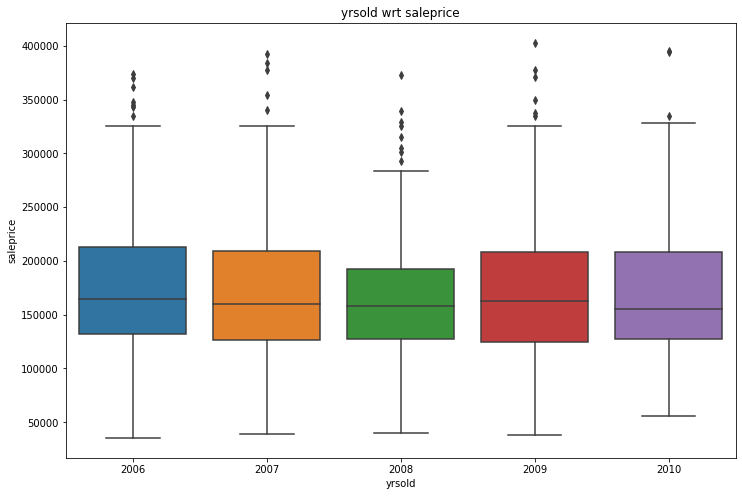

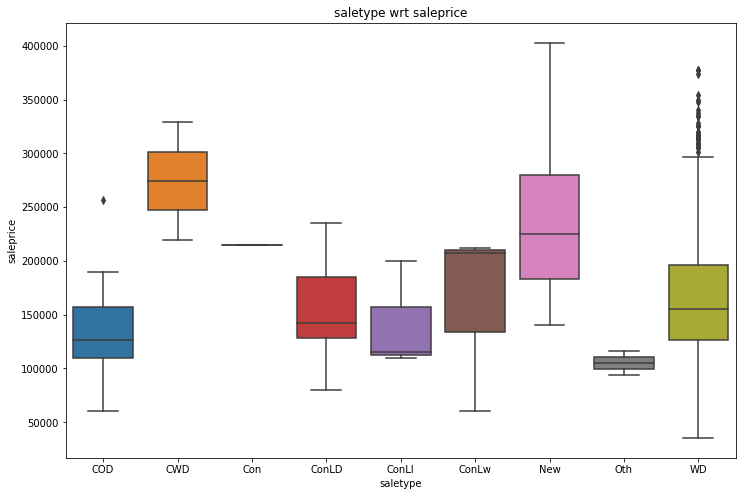

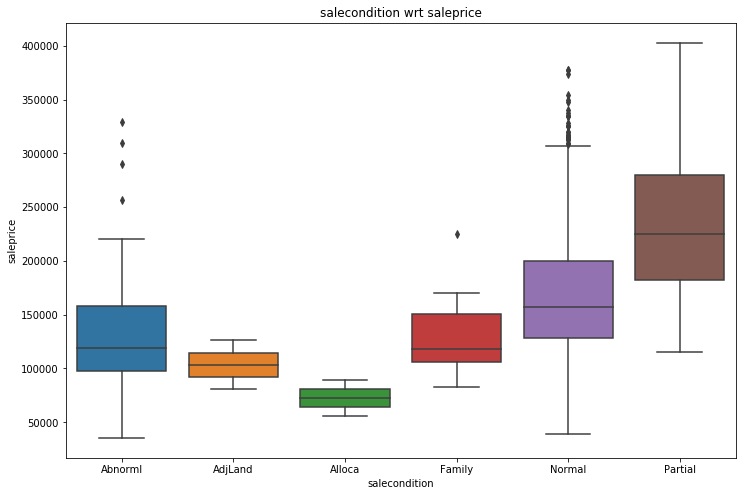

In [46]:
for col in df.describe(include='category').columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=col, y='saleprice', data=df)
    plt.title('{} wrt saleprice'.format(col))
    plt.show()

There are a number of possibly useful features garnered from above, it appears that saleprice varies significantly with respect to the following:
- `mssubclass`
- `mszoning`
- `street`
- `landslope`
- `neighborhood`
- `condition1`
- `housestyle`
- `overallqual`
- `exterqual`
- `bsmtqual`
- `bsmtcond`
- `kitchenqual`

# 2.3: Feature Engineering

In addition to possible variables of use above, it may be of use to get a general understanding of what experts in the field say are some general features that affect the price of a house. In other words, it may be useful to get some domain/business expertise on the area of interest, in this case the housing market. In that vain, I did a quick search on Google and perused some articles. I found a pretty great article entitled [8 critical factors that influence a home’s value](https://www.opendoor.com/w/blog/factors-that-influence-home-value) by Joe Gomez where he posits 8 general categories that affect the price of a house. I have also included variables from the dataset that align with these categories.

The following is a breakdown of many possible features worth deriving or searching for in the variables related to house price:
1. Neighborhood Comps - some info contained in dataset
    - Similar houses sold in the same neighborhood - `neighborhood` variable
    - Recency of sale
    - Similarity between houses - `mssubclass` variable
    - Same subdivision?
    - Specialties surrounding location of a house (Proximity to busy street, golf course, waterfront, etc.)
2. Location - no real data found in this dataset
    - Quality of local schools
    - Employment opportunities
    - Proximity to shopping, entertainment, rec centers, expressways, railroads, power lines, etc.
3. Home size and Usable space - pretty significant info about this
    - Square footage - `totalbsmtsf` + `firstflsf` + `secondflrsf` = totalsf?
    - Price per square foot (ppsqf)
    - Usable space: garage, attics, unfinished basements generally are not usable space - `grlivarea`
    - Number of bedrooms - `bedroomabvgr`
    - Number of bathrooms - `fullbath` + `halfbath` = totalbath?
4. Age and condition - pretty good info contained about this
    - Newness - guessing higher price - `yrbuilt`
5. Upgrades and Updates or Special Features - these end up being too sparce to get good information from our dataset
    - Pool?
    - Flooring?
    - Kitchen remodel?
    - Additional bathroom?
    - Sun room?
6. Local Market - possibly a way to get this information, but for a quick look may be too involved to derive these features
    - Days on market
    - Number of properties for sale in area
    - Number of buyers in area
7. Economic Indicators - same as local market
    - Employment rates
    - Interest rates
    - Incentives not to sell present?
    - Anything affecting supply and demand
    - Supply up? Generally house price goes down and vise versa.
    - Demand up? Generally house price goes up and vise versa.
8. Interest Rates - same as local market
    - If they go up, house prices probably go down
    - If they go down, house prices probably go up

So, with all that said, let's gather all the aforementioned 'useful' variables together and look into them a bit further. They'll be divided by their type listed in the above list:
- Neighborhood Comps
    - `neighborhood`
    - `mssubclass`
    - `mszoning`
    - `street`
- Home size and usable space
    - `totalsf` = `totalbsmtsf` + `firstflsf` + `secondflsf` and reexamine
    - usable space as `grlivarea`
    - bedrooms as `bedroomabvgr`
    - bathrooms as `totalbath` = `fullbath` + `halfbath`
    - `garagearea` seemed to be pretty correlated with saleprice
- Age and condition
    - `selling_age` = `yrsold` - `yearbuilt`
    - multiple condition indicators: `landslope`, `condition1`, `housestyle`, `overallqual`, `exterqual`, `bsmtqual`, `bsmtcond`, `kitchenqual`

I think simplifying the features down to potentially 17 features from the original 80 some variables is pretty significant progress. Especially if we can predict with any kind of accuracy. Let's engineer the above features really quick.

In [47]:
data_Y = df.saleprice

In [48]:
data_X = pd.DataFrame()

In [49]:
data_X['totalsf'] = df.totalbsmtsf + df.firstflrsf + df.secondflrsf
data_X['grlivarea'] = df.grlivarea
data_X['bedroomabvgr'] = df.bedroomabvgr
data_X['totalbath'] = df.fullbath + df.halfbath
data_X['garagearea'] = df.garagearea
data_X['selling_age'] = df.yrsold.astype('int') - df.yearbuilt.astype('int')

In [50]:
dum_list = ['mszoning', 'street', 'neighborhood', 'mssubclass','landslope', 'condition1', 'housestyle', 
            'overallqual', 'exterqual', 'bsmtqual', 'bsmtcond', 'kitchenqual']
for var in dum_list:
    data_X = data_X.join(pd.get_dummies(df[var], prefix=var, drop_first=True)).copy()

In [51]:
data_XY = data_X.join(data_Y)

In [52]:
def corr_lev_matrix(lvl):
    corr_matrix = data_XY.corr()[(abs(data_XY.corr()) > lvl) & (data_XY.corr() != 1)].dropna(how='all').dropna(how='all', axis=1)
    plt.figure(figsize=(17,7))
    sns.heatmap(corr_matrix, annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=.5, linecolor='black')
    plt.ylim(corr_matrix.shape[1], 0)
    plt.title('Correlation Matrix Heatmap @ {} corr or stronger'.format(lvl))
    plt.show()

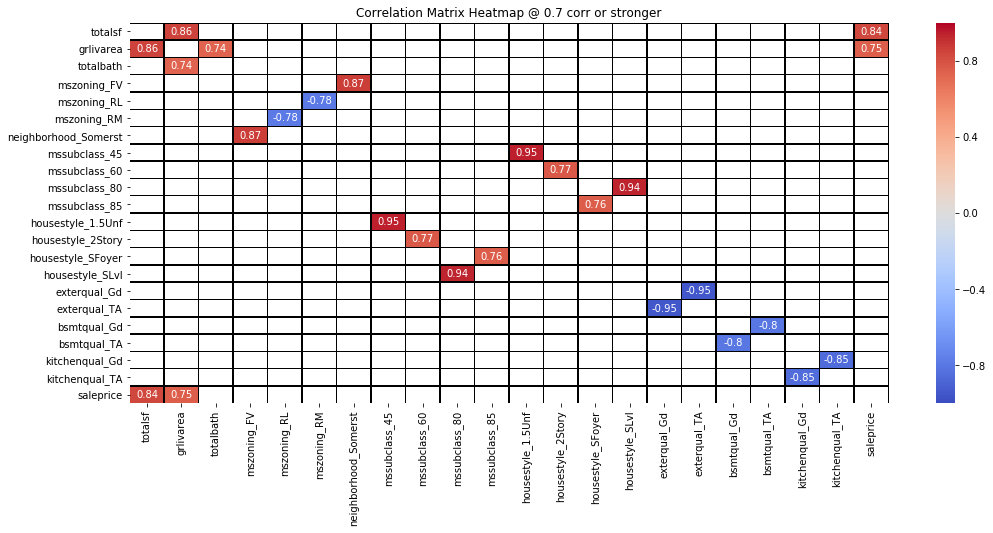

In [53]:
corr_lev_matrix(.7)

Looks like there are a number of highly correlated variables to one another - meaning we can likely use one or the other in these cases. The above chart indicates where this is the case, here is the thought process behind selecting the features:
- `totalsf` is highly related to `grlivarea` which in turn is highly related to `totalbath`, may be best to eliminate `totalbath` and `totalsf` in favor of `grlivarea` as it highly describes the other two (but does it describe `saleprice` well?) - it may actually be better to eliminate `grlivarea` and preserve both `totalsf` and `totalbath`
- Looks like the majority of homes that are `mszoning_FV` are in `neighborhood_Somerst` and vise-versa (we don't need both)
- Looks like `mszoning_RM` and `mszoning_RL` are significantly negatively correlated, we can drop one
- `mssubclass_45` and `housestyle_1.5Unf` are essentially the same, we'll keep `mssubclass_45` as it contains more information as a variable
- Similar with `mssubclass_60` and `housestyle_2Story`; `mssubclass_80` and `housestyle_SLvl`; `mssubclass_85` and `housestyle_SFoyer`
- `exterqual_Gd` and `exterqual_TA` are practically opposite
- `bsmtqual_Gd` and `bsmtqual_TA` are practically opposite
- `kitchenqual_Gd` and `kitchenqual_TA` are basically opposite

In [54]:
data_X.mszoning_RM.corr(data_Y), data_X.mszoning_RL.corr(data_Y)

(-0.36060427876834583, 0.25917104030206867)

In [55]:
data_X.exterqual_Gd.corr(data_Y), data_X.exterqual_TA.corr(data_Y)

(0.5827609372708389, -0.6341100221801849)

In [56]:
data_X.bsmtqual_Gd.corr(data_Y), data_X.bsmtqual_TA.corr(data_Y)

(0.3573314688792092, -0.5305337782677945)

In [57]:
data_X.kitchenqual_Gd.corr(data_Y), data_X.kitchenqual_TA.corr(data_Y)

(0.43688935606393037, -0.5670841223091857)

In [58]:
drop_feat = ['grlivarea', 'neighborhood_Somerst', 'mszoning_RL', 'housestyle_1.5Unf', 'housestyle_2Story', 'housestyle_SLvl', 'housestyle_SFoyer', 'exterqual_Gd',
             'bsmtqual_Gd', 'kitchenqual_Gd']
data_X.drop(columns=drop_feat, inplace=True)

What about variables that aren't a great indicator for `saleprice`?

In [59]:
data_XY.corr().saleprice.values

array([ 0.84107789,  0.75423642,  0.27079662,  0.61204397,  0.67372018,
       -0.62949403,  0.15845523, -0.07426343,  0.25917104, -0.36060428,
        0.05835186, -0.0233577 , -0.12979958, -0.18217469,  0.03393115,
        0.14982028,  0.04873283, -0.20212354,  0.07778761, -0.17961521,
       -0.15048074, -0.05674594, -0.19828191, -0.03813895,  0.03345383,
        0.2473906 ,  0.3658283 , -0.23424945, -0.06822955, -0.13145504,
        0.02608623,  0.21590172,  0.20214506,  0.18333528,  0.01449413,
       -0.29494141, -0.00973355, -0.09874275, -0.19901057,  0.41484221,
       -0.03586886, -0.02719684, -0.02458175, -0.04599987, -0.04318211,
        0.0774722 , -0.13155462, -0.10772159, -0.05865825,  0.00557531,
       -0.06007748, -0.12267551,  0.13581908,  0.05173667,  0.03594124,
       -0.03066204,  0.01762483,  0.00729664,  0.02547   , -0.10171242,
       -0.06925428,         nan, -0.02719684,  0.28231503, -0.10528155,
       -0.03844968, -0.10142799, -0.14627957, -0.32089017, -0.39

In [60]:
drop_feat = []
for i, val in enumerate(data_XY.corr().saleprice.values, 0):
    if abs(val) < .05 or val is np.nan:
        drop_feat.append(data_XY.corr().saleprice.index[i])

In [61]:
for col in drop_feat:
    try:
        data_X.drop(columns=col)
    except:
        print('{} was already dropped'.format(col))

housestyle_SLvl was already dropped


OK, now that variables that are highly correlated with one another and variables that have very little correlation to the target variable have been dropped, let's standardize the features to make things easier for the modeling phase.

In [62]:
data_XY = data_X.join(data_Y)

In [63]:
scaler = StandardScaler()
scaled_XY_df = pd.DataFrame(scaler.fit_transform(data_XY), columns=data_XY.columns)

In [64]:
scaled_XY_df.shape

(1038, 80)

# 3: Regression Modeling

Let's redefine our target and data, then split it up.

In [65]:
target = scaled_XY_df.iloc[:, -1]

In [66]:
data = scaled_XY_df.iloc[:, :-1]

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=.3, random_state=21)

In [68]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((726, 79), (312, 79), (726,), (312,))

In [69]:
lm = linear_model.LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
Y_pred = lm.predict(X_test)

## Evaluate Model

In [71]:
from sklearn import metrics

In [72]:
def evaluate(Y_test, Y_pred):
    mse = metrics.mean_squared_error(Y_test, Y_pred)
    msa = metrics.mean_absolute_error(Y_test, Y_pred)
    r2 = metrics.r2_score(Y_test, Y_pred)
    
    print('Mean squared error:', mse)
    print('Mean absolute error:', msa)
    print('R^2:', r2)
    
    plt.scatter(Y_test, Y_pred)
    plt.xlabel('Prices: $Y_i$')
    plt.ylabel('Predicted prices: $\hat{Y}_i$')
    plt.title('Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$')

Mean squared error: 2.691959698662832e+23
Mean absolute error: 41540524689.38955
R^2: -2.8875289852446235e+23


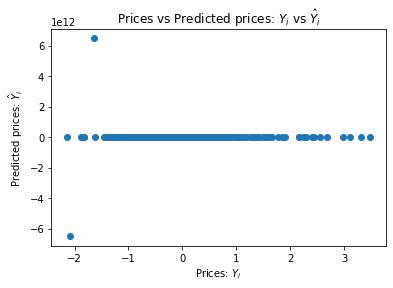

In [73]:
evaluate(Y_test, Y_pred)

Looks like this model really preferred zero values, it's ability is pretty atrocious. What if we just used the continuous variables?

In [74]:
data = data.iloc[:, 0:5].copy()

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=.3, random_state=21)

In [76]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((726, 5), (312, 5), (726,), (312,))

In [77]:
lm = linear_model.LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
Y_pred = lm.predict(X_test)

Mean squared error: 0.17271634401368186
Mean absolute error: 0.31561907527217753
R^2: 0.8147359153211999


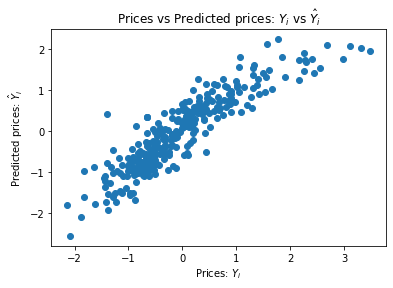

In [79]:
evaluate(Y_test, Y_pred)

So... Looks like this works immensely better...the more complicated model appeared to overfit like crazy for all those categorical variables. Looks like the continuous variables provided the most value. However, I do wonder if certain categorical values could be better predictors for this dataset.

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
cross_val_score(lm, data, target, cv=5)

array([0.79678862, 0.82930339, 0.79732918, 0.82530037, 0.75473194])

Cross validation is showing that the model doesn't seem to overfit!

In [82]:
data.columns

Index(['totalsf', 'bedroomabvgr', 'totalbath', 'garagearea', 'selling_age'], dtype='object')

Ultimately the features used here were standardized versions of `totalsf`, `bedroomabvgr`, `totalbath`, `garagearea`, and `selling_age`. And it appears that it gets it pretty close to right around 80% of the time. I'll take it for my first regression model!